In [1]:
%load_ext autoreload
%autoreload 2

import sys, pickle
from pathlib import Path

from matplotlib import pyplot as plt
import numpy as np

root_dir = Path.cwd().parents[1]
if not root_dir in sys.path: sys.path.insert(0,str(root_dir))
print(root_dir)

from placefield_detection.surrogate_data import SurrogateData
from placefield_detection.utils import prepare_behavior_from_file, prepare_activity
# from HierarchicalBayesInference_analysis import HierarchicalBayesInference_analysis

/home/wollex/Data/Science/WolfGroup/PlaceFields/Programs/PC_analysis/placefield_dynamics


In [ ]:
track = {
    "nbin": 40,
    "length": 100,
}

place_field_parameter = {
    "field_probabilities": [0.2, 0.7],
    "A0": [0, 2],
    "A": [5, 10],
    "sigma": [1, 5],
    "theta": [0, track["nbin"]],
    "reliability": [0.2, 0.9],
}

pathSession = Path("../../../../data/845ad/Session10")
pathBehavior = pathSession / "aligned_behavior.pkl"
behavior = prepare_behavior_from_file(pathBehavior, nbin=track["nbin"], f=15.0)

'\n\tTODO:\n\t\t[ ] change way how mode numbers are generated: provide 3 values [0,1]:\n\t\t\tfirst value is prob for 0, second for 1, third for 2 modes\n'

In [3]:
n_cells = 100
surrogate_data = SurrogateData(None, n_cells, track, place_field_parameter, behavior)
# place_cell_probability=np.array([0.3,0.8]))

In [5]:
surrogate_data.generate_activity_all(nP=8)

>>> all done. time passed: 0.6024 secs <<<


In [12]:
data = {
    "tuning_curve_parameter": surrogate_data.tuning_curve_parameter,
    "behavior": behavior,
    "activity": surrogate_data.activity,
    "field_activation": surrogate_data.field_activation,
}
with open("surrogate_data_100.pkl", "wb") as f:
    pickle.dump(data, f)

In [14]:
# surrogate_data = SurrogateData("../../../../data/testdata/surrogate_data_n=100_1.pkl")

FileNotFoundError: [Errno 2] No such file or directory: '../../../../data/testdata/surrogate_data_n=100_1.pkl'

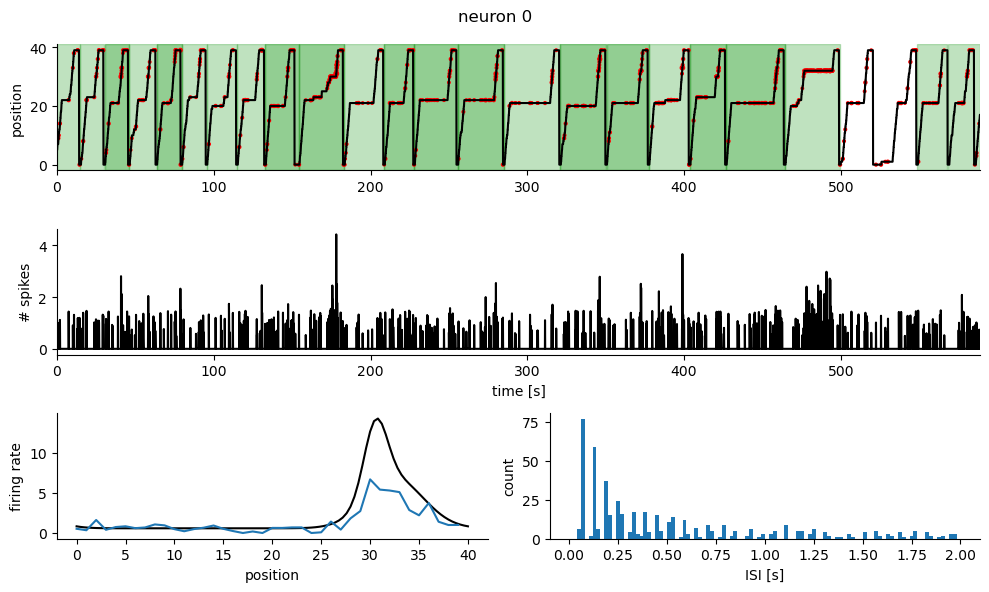

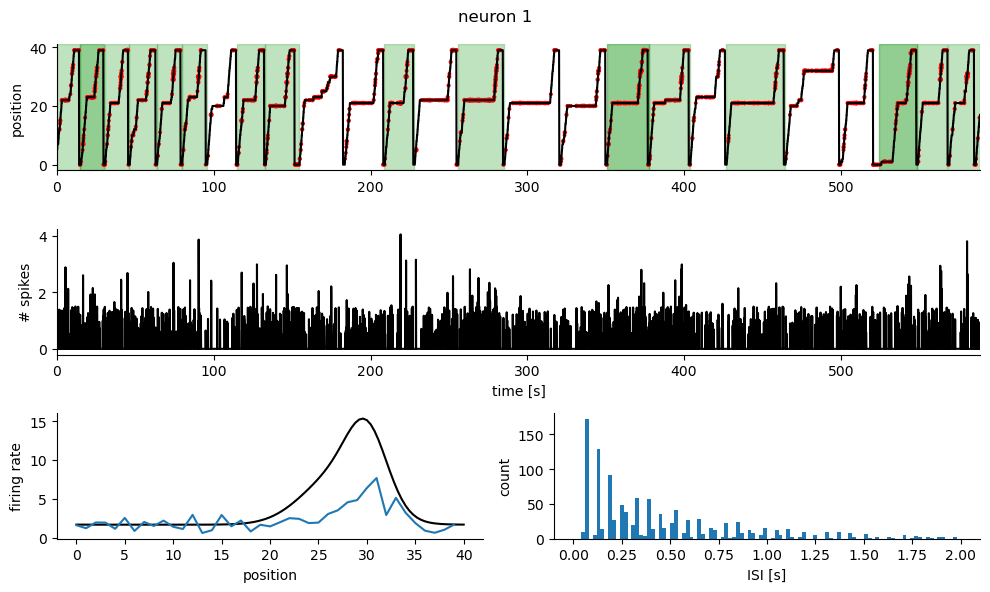

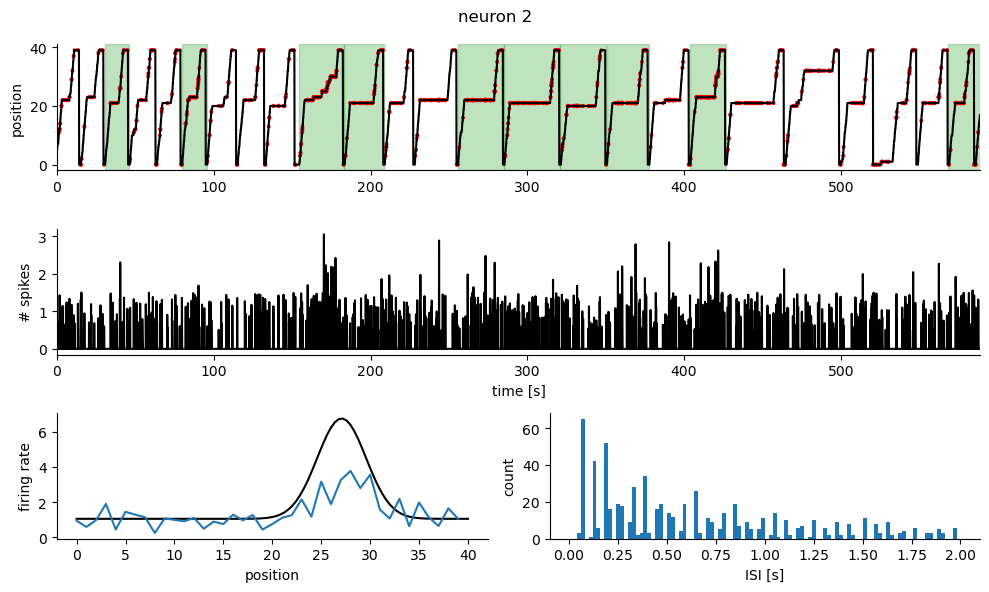

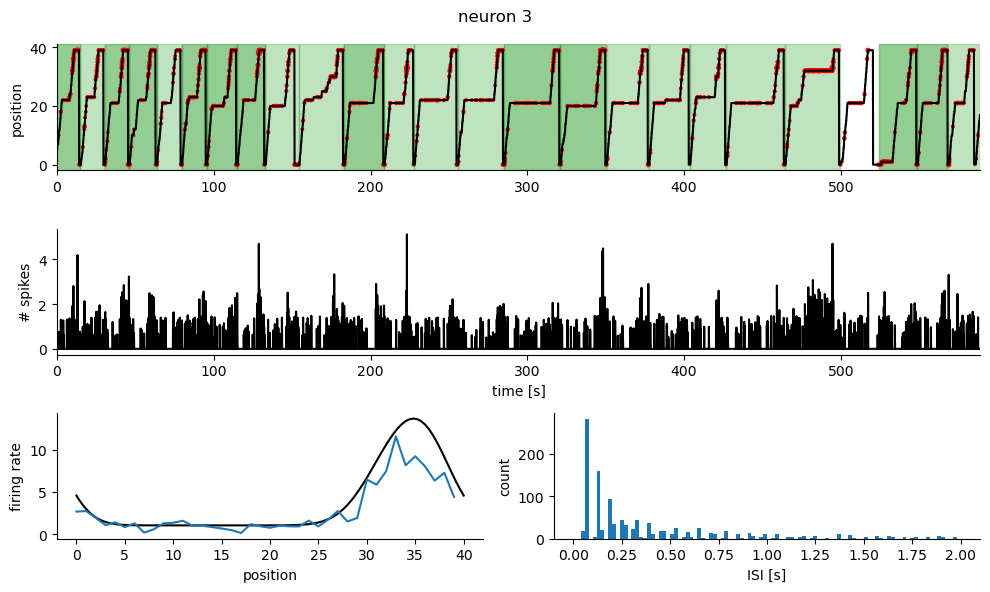

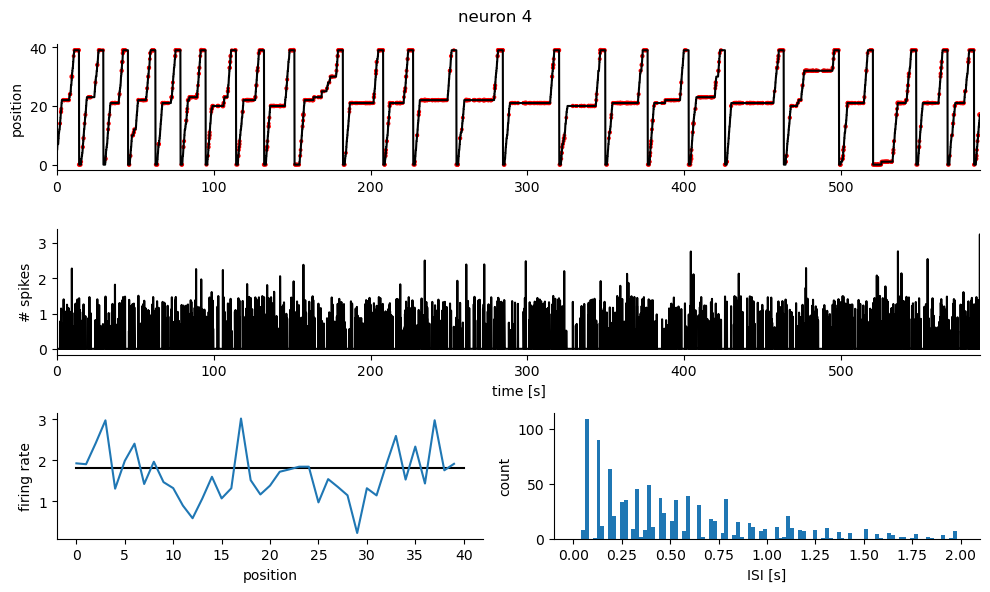

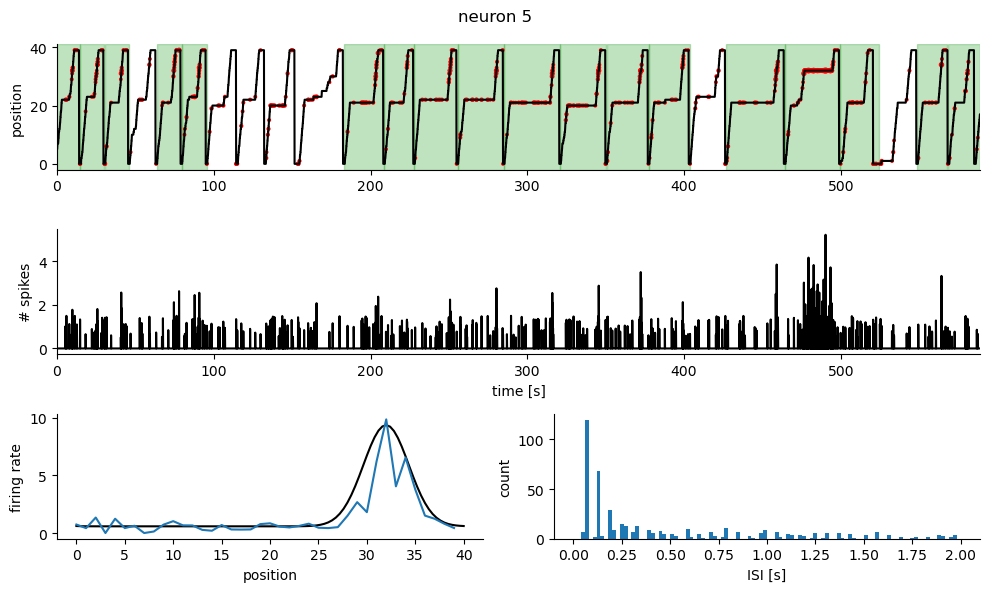

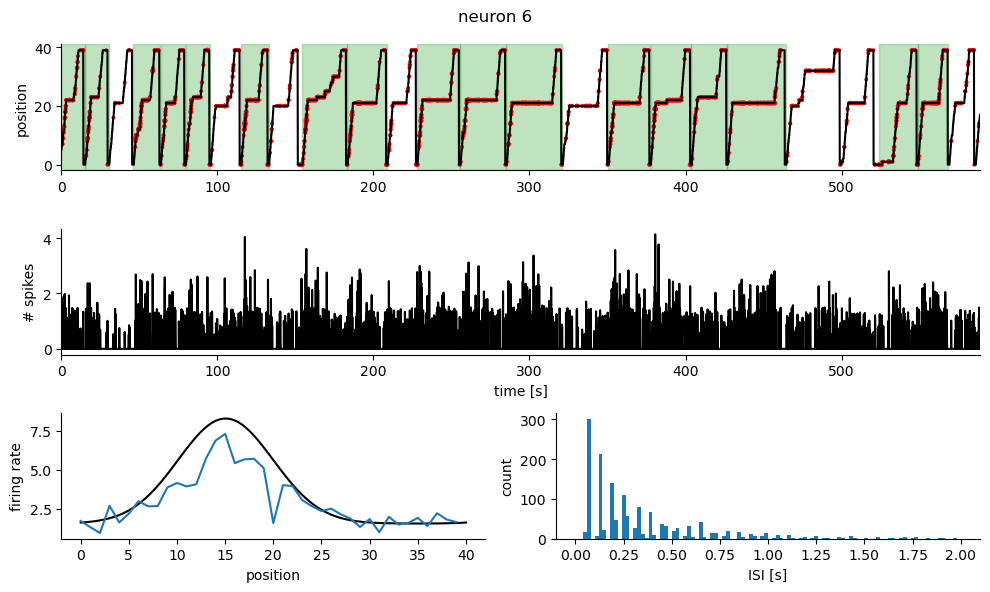

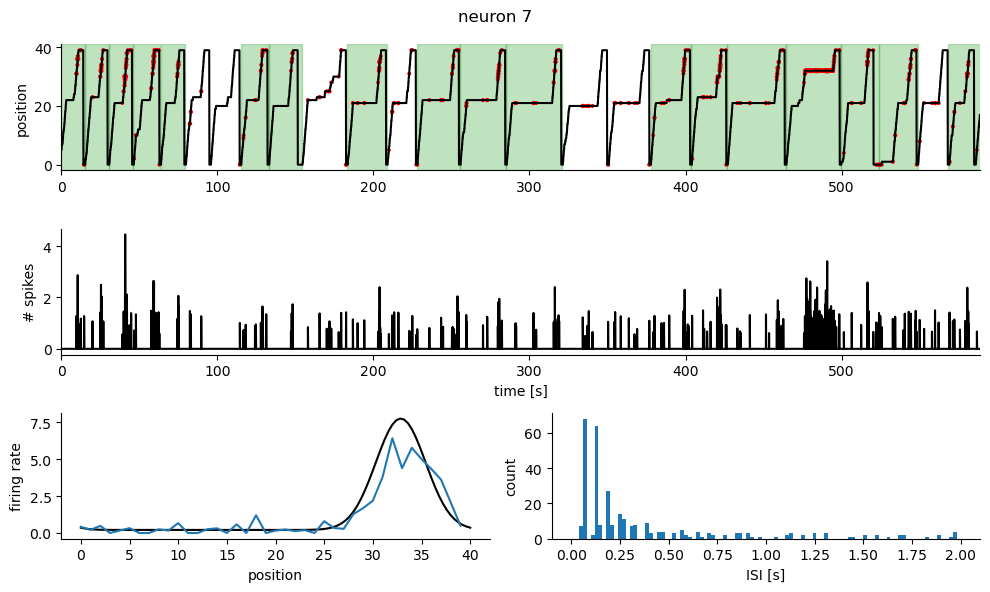

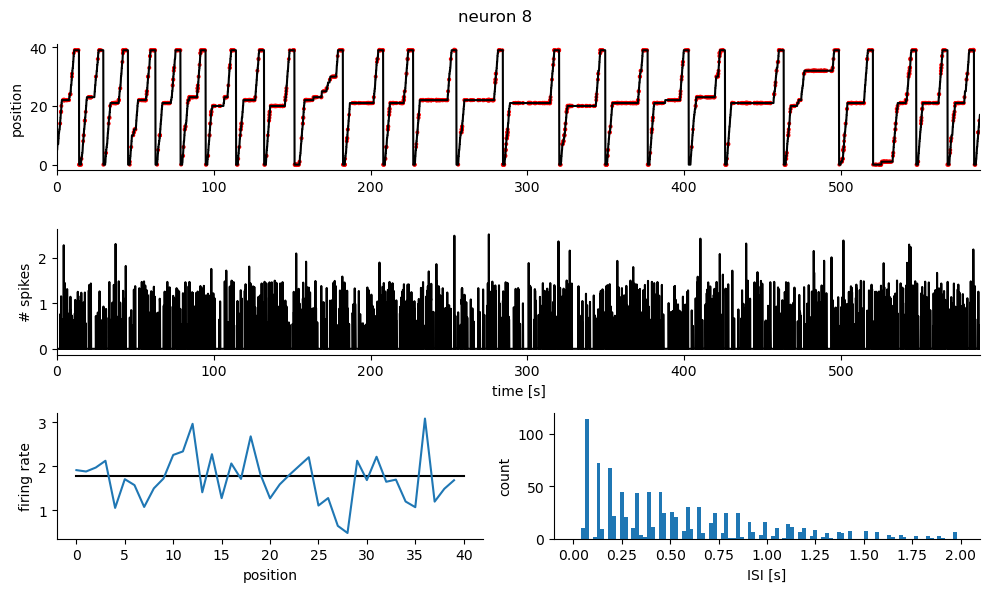

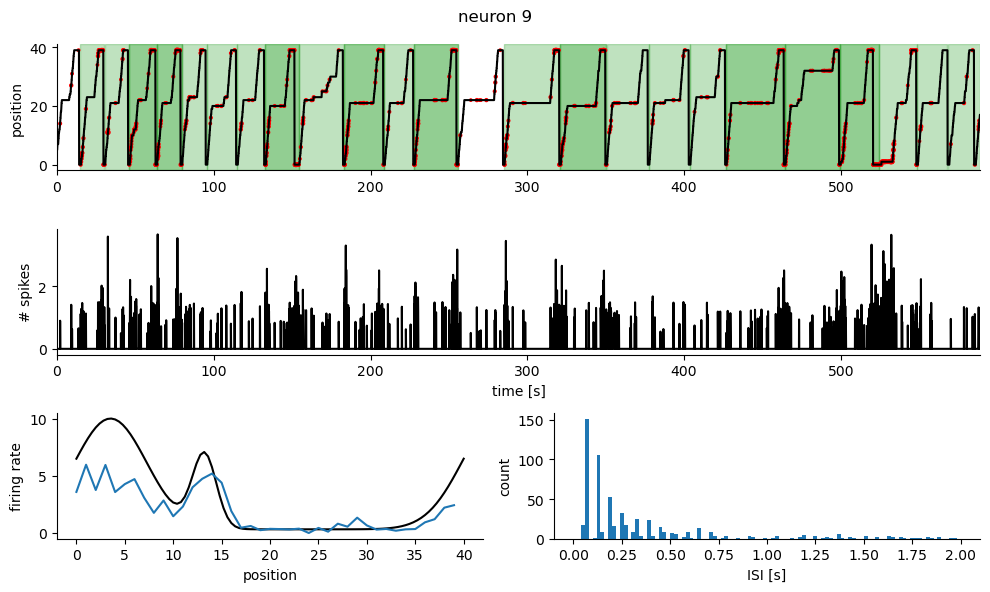

In [6]:
for n in range(10):
    surrogate_data.plot_activity(n)

In [7]:
from placefield_detection.process_session import process_session

pathSession = Path("../../../data/845/Session10")
ps = process_session(plot_it=False)
results = ps.from_input(
    behavior,
    surrogate_data.activity,
    specific_n=range(10),
    mode_place_cell_detection=["peak", "information","stability"],
    mode_place_field_detection=["bayesian","threshold"],
    # path_results=pathSession / "surrogate_placefield_detection.hdf5",
    nP=12,
)

"""
	TODO:
		[ ] write analysis script for surrogate data comparing (including special case of closeby fields)
        [ ] add surrogate data with place field movement within session and test it!
        [ ] process large scale surrogate data on cluster (with "realistic" parameters)
        [ ] adjust plot-scripts and add potentially new analyses from peak detection, etc
        [ ] some sessions didnt process properly within 2h, while others run within 10 minutes
"""

run detection on 100 neurons
run stability method
100 neurons in total
100 neurons to be processed


100it [00:00, 215.77it/s]


Model comparison finished after 2.00s with evidences: 	 f=0 *, logz=-837.59	 f=1 , logz=-837.57
Model comparison finished after 4.41s with evidences: 	 f=0 *, logz=-796.24	 f=1 , logz=-796.27
Model comparison finished after 4.91s with evidences: 	 f=0 *, logz=-794.71	 f=1 , logz=-795.46
Model comparison finished after 6.42s with evidences: 	 f=0 *, logz=-791.78	 f=1 , logz=-791.70
Model comparison finished after 31.91s with evidences: 	 f=0 *, logz=-695.96	 f=1 , logz=-695.92
Model comparison finished after 273.67s with evidences: 	 f=0 , logz=-940.54	 f=1 *, logz=-807.22	 f=2 , logz=-808.64
Model comparison finished after 309.97s with evidences: 	 f=0 , logz=-1179.49	 f=1 *, logz=-883.81	 f=2 , logz=-886.37
Model comparison finished after 321.67s with evidences: 	 f=0 , logz=-772.02	 f=1 *, logz=-732.22	 f=2 , logz=-731.79
Model comparison finished after 347.44s with evidences: 	 f=0 , logz=-1108.29	 f=1 *, logz=-986.62	 f=2 , logz=-988.86
Model comparison finished after 351.51s with 

'\n\tTODO:\n\t\t[ ] write analysis script for surrogate data comparing (including special case of closeby fields)\n        [ ] add surrogate data with place field movement within session and test it!\n        [ ] process large scale surrogate data on cluster (with "realistic" parameters)\n        [ ] adjust plot-scripts and add potentially new analyses from peak detection, etc\n        [ ] some sessions didnt process properly within 2h, while others run within 10 minutes\n'

In [105]:
results[0]["bayesian"]["field_models"].keys()

dict_keys(['logz', 0, 1, 2])

In [ ]:
from placefield_detection.result_structures import build_results, handover_inference_results
from placefield_detection.BayesModel import HierarchicalBayesInference

modes = ["peak", "information"] + ["bayesian","threshold"]
unique_modes = list(set(modes))
print(unique_modes)

prepared_activity = prepare_activity(
    surrogate_data.activity[0,:],
    behavior,
)
HBI = HierarchicalBayesInference(logLevel="DEBUG")
HBI.prepare_data(
    prepared_activity["map_trial_spikes"],
    behavior["trials"]["dwelltime"],
    iter_dims=False,
    dimension_names=["trials", "position_bins"],
)

# result = build_results(
#     n_cells=len(results),
#     nbin=behavior["nbin"],
#     n_trials=behavior["trials"]["ct"],
#     N_f=2,
#     hierarchical=["theta"],
#     modes=unique_modes,
#     HBI=HBI
# )

# for r, res in enumerate(results):
#     if res:
#         result = handover_inference_results(
#             res, result, r, excluded_keys=["x"]
#         )
# # "handover stimmt nicht - wird garnicht richtig initiiert"

print(result["bayesian"].keys())
print(results[0].keys())
# results["stability"] = results_batch["stability"]


['information', 'peak', 'threshold', 'bayesian']


AttributeError: 'str' object has no attribute 'keys'

In [ ]:
from placefield_detection.BayesModel import place_field
from placefield_detection.utils import model_of_tuning_curve
from placefield_detection.analyze_results import cast_results_to_params
from placefield_detection.result_structures import extract_inference_results
from placefield_detection.HierarchicalBayesModel import HierarchicalModel
x = np.linspace(0,39,40)
n_x = len(x)

idx=1
result = extract_inference_results(results,idx)
# print(result["bayesian"]["field_models"][1]["parameter"]["global"]["theta"])
parameter = cast_results_to_params(result["bayesian"]["field_models"][1]["parameter"],N_f=1)

p_in = []
p_in.extend(parameter["A0"])
for f,field in enumerate(parameter["fields"]):
    for key in ["A","sigma","theta"]:
        if key=="theta":
            p_in.extend(result["bayesian"]["field_models"][1]["parameter"]["global"]["theta_mean"][f,0][...,np.newaxis])
            p_in.extend(result["bayesian"]["field_models"][1]["parameter"]["global"]["theta_sigma"][f,0][...,np.newaxis])
        p_in.extend(getattr(field,key))

p_in = np.array(p_in)


prepared_activity = prepare_activity(
    surrogate_data.activity[idx,:],
    behavior,
)
print(prepared_activity["map_trial_spikes"].shape)
HBI = HierarchicalBayesInference(logLevel="DEBUG")
HBI.prepare_data(
    prepared_activity["map_trial_spikes"],
    behavior["trials"]["dwelltime"],
    iter_dims=False,
    dimension_names=["trials", "position_bins"],
)
HBI.set_priors()
my_logl = HBI.set_logp_func(vectorized=False)
logp,active_model = my_logl(p_in,get_logp=True)

"""
theta_mean and theta_sigma missing in handover!
"""
print(p_in)

# fig = plt.figure()
# ax = fig.add_subplot(111)

# normal = model_of_tuning_curve(x, parameter, n_x, parameter["fields"][0].theta.shape[0], fields = 0,stacked=False)
# print(normal.shape)

# # normal = A0 + A * np.exp(-(np.mod(x - theta + n_x/2, n_x) - n_x/2)**2 / (2*sigma**2))
# ax.plot(x, normal[0,...].T) 
x

DEBUG:nestLogger:time for transforming parameters: 43.63
DEBUG:nestLogger:time for tuning curve model: 167.61
DEBUG:nestLogger:time for poisson: 6299.02
DEBUG:nestLogger:time for infield ranges: 76.53
DEBUG:nestLogger:time for active model: 101.80


(25, 40)
[[[         nan          nan          nan          nan          nan
    -4.19232326  -1.84523533  -1.0328247   -0.19129458  -0.19129458
    -0.19129458  -0.28694187  -0.47823644  -1.84523533  -0.28694187
    -0.19129458  -1.84523533  -0.19129458  -0.28694187  -0.19129458
    -0.19129458  -1.84523533  -1.00097572  -1.21588646  -0.76517831
    -0.28694187  -0.19129458  -0.38258915  -2.44273522  -0.28694187
    -0.19129458  -0.19129458  -0.28694187  -0.38258915  -0.19129458
    -0.19129458  -0.19129458  -0.19129458  -0.28694187  -1.12921219]
  [-12.00293686  -0.19129458  -2.99732348  -7.40381727  -7.40381727
    -0.19129458  -0.19129458  -1.84523533  -0.28694187  -6.9448763
    -0.19129458  -0.19129458  -0.28694187  -0.19129458  -0.28694187
    -0.19129458  -0.28694187  -0.19129458  -0.28694187  -1.84523533
    -0.19129458  -0.19129458  -1.53541751  -0.95647288  -0.19129458
    -0.28694187  -0.19129458  -0.28694187  -0.19129458  -0.19129458
    -2.37768784  -0.19129458  -0.286941

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39.])

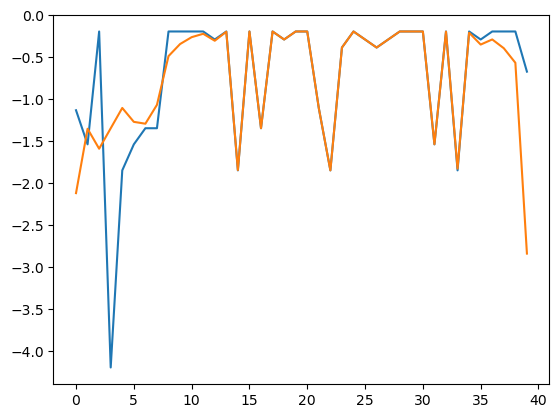

In [376]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(logp[:,0,2,:].T)

In [341]:
results.pop("stability")

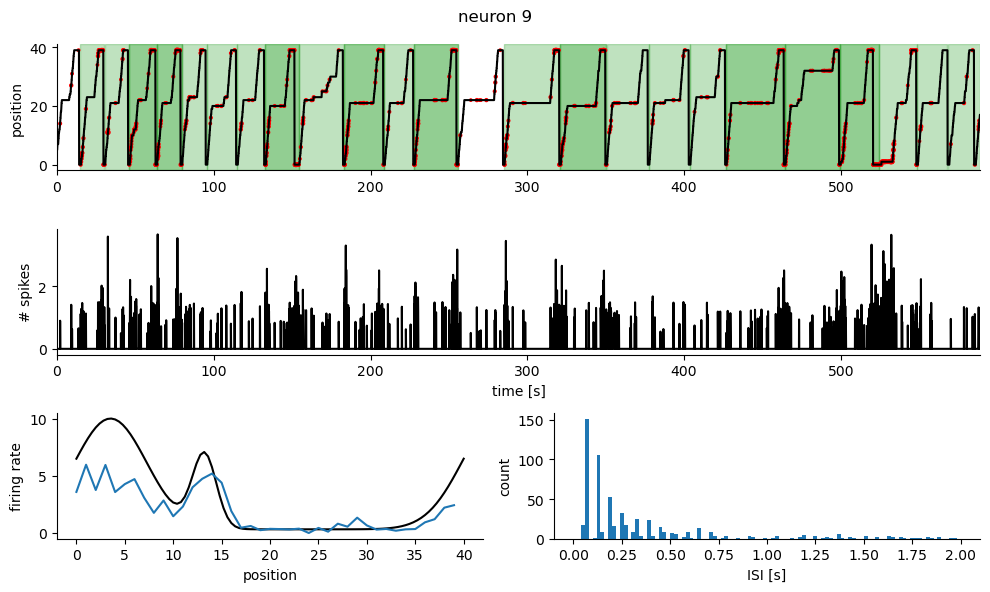

A0: 0.322256565075707 vs 0.3881567410616705
field 1 A: [9.68357892] vs 9.045195818909187
field 1 sigma: [3.71495485] vs 3.5980114574940707
field 2 A: [6.4319759] vs 8.673862799716527
field 2 sigma: [1.23809325] vs 1.2250401659108558
sensitivity=array([0.52173913, 0.65217391]), specificity=array([1., 1.])


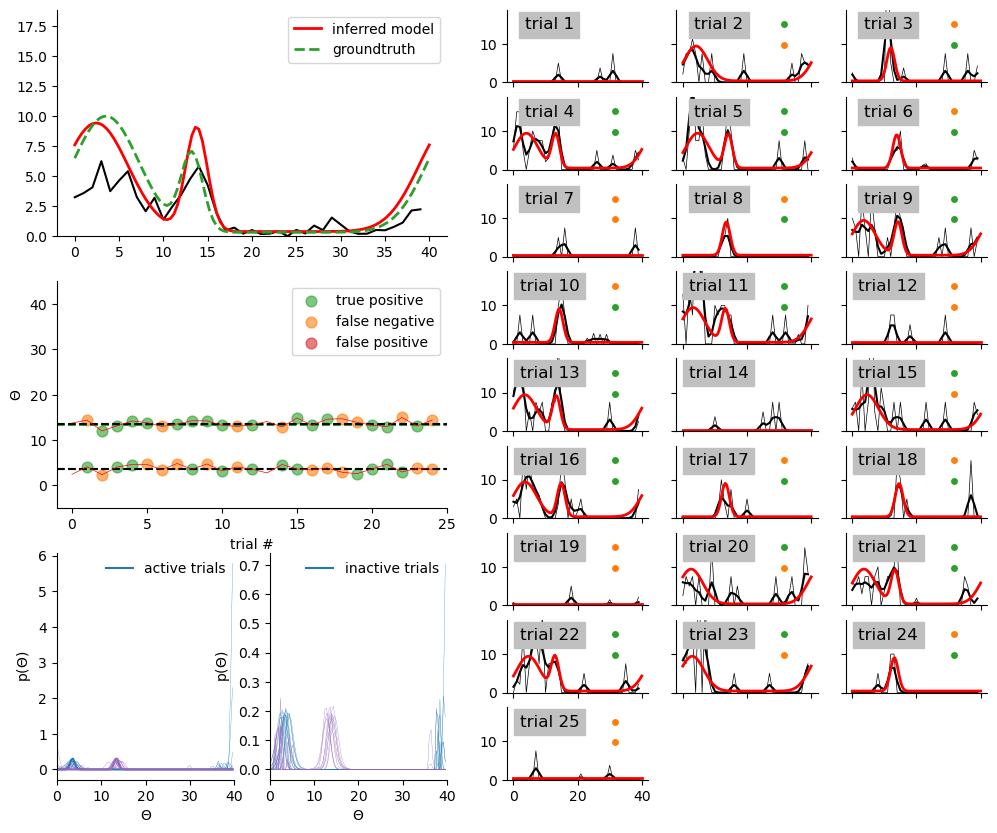

In [31]:
from placefield_detection.analyze_results import display_results
"""
FIX:
* should theta array go up to 40, or only 39?
* get_mean_from_samples & get_posterior_statistics -> merge with other method and allow for circular calculus!
* check, why trial 1 & 3 are not showing a field!!
"""
idx = 9
surrogate_data.plot_activity(idx)
display_results(results, idx, surrogate_data.tuning_curve_parameter[idx],surrogate_data.field_activation[idx])

In [403]:
from placefield_detection.result_structures import extract_inference_results
# result = extract_inference_results(results, idx)
results["bayesian"]["field_models"][1]["parameter"]["local"]["theta"][1,...]

array([[[2.56094461, 0.79631427, 4.77396822],
        [2.51123495, 1.27656027, 3.70338403],
        [2.79698515, 0.94683386, 4.65239916],
        [2.77855439, 1.01529093, 4.60837382],
        [2.0042126 , 1.14313471, 2.83996317],
        [3.67300046, 2.55536871, 4.97036858],
        [1.13361044, 0.17767254, 2.26907869],
        [1.61722163, 0.61504773, 2.54992447],
        [2.82953051, 0.97965265, 5.00093147],
        [3.61471188, 2.37564264, 4.89932158],
        [2.85989926, 1.02004519, 4.83352109],
        [3.10069007, 1.11899013, 5.26804089],
        [3.60984844, 2.56759693, 4.73700094],
        [2.25225719, 1.27948327, 3.22476532],
        [1.52272071, 0.3114471 , 2.64397005],
        [3.77478168, 2.69992825, 5.00234035],
        [3.4604397 , 2.44823676, 4.52291083],
        [3.0188383 , 1.1610633 , 4.94870451],
        [2.90424489, 0.82389463, 4.8620212 ],
        [2.44305782, 1.44683336, 3.50002918],
        [3.17835707, 2.089062  , 4.30852382],
        [3.73073544, 2.42096858, 5

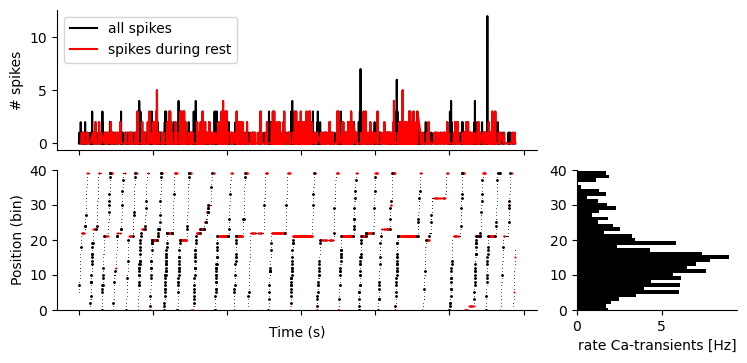

DEBUG:nestLogger:time for transforming parameters: 72.48
DEBUG:nestLogger:time for tuning curve model: 286.58
DEBUG:nestLogger:time for poisson: 305.41
DEBUG:nestLogger:time for infield ranges: 169.04
DEBUG:nestLogger:time for active model: 342.85
DEBUG:nestLogger:time for raw logp: 14.78
DEBUG:nestLogger:time for overlap penalty: 108.00
DEBUG:nestLogger:time for reliability penalty: 106.10
DEBUG:nestLogger:time for lower_bound_0 penalty: 66.52
DEBUG:nestLogger:time for ordered fields penalty: 13.11
DEBUG:nestLogger:time for penalties: 8.82


-1675.7373546671304

In [255]:
from placefield_detection.BayesModel import HierarchicalBayesInference
from placefield_detection.utils import plot_activity
import numpy as np

activity = prepare_activity(surrogate_data.activity[n, :], behavior, f=15.0, only_active=True)
plot_activity(activity, behavior, f=15)


HBI = HierarchicalBayesInference(logLevel="DEBUG")
HBI.prepare_data(
    activity["map_trial_spikes"],
    behavior["trials"]["dwelltime"],
    iter_dims=False,
    dimension_names=["trials", "position_bins"],
)

HBI.set_priors(N_f=2)

model = 2
# print(results["bayesian"]["field_models"][model]["parameter"])

# p_good = np.zeros((len(HBI.parameter_names_all),))
# p_good[0] = result["bayesian"]["field_models"][model]["parameter"]["global"]["A0"][0]
# p_good[[1,7]] = result["bayesian"]["field_models"][model]["parameter"]["global"]["A"][:2,0]
# p_good[[2,8]] = result["bayesian"]["field_models"][model]["parameter"]["global"]["sigma"][:2,0]
# p_good[[3,9]] = result["bayesian"]["field_models"][model]["parameter"]["global"]["theta"][:2,0]
# p_good[[4,10]] = result["bayesian"]["field_models"][model]["parameter"]["global"]["theta_sigma"][:2,0]


# p_good[[5:5+HBI.n_samples]] = result["bayesian"]["field_models"][model]["parameter"]["local"]["theta"][0,0,0]
# p_good[[6,12]] = result["bayesian"]["field_models"][model]["parameter"]["local"]["theta"][:2,1,0]


# p_good[[11:11+HBI.n_samples]] = result["bayesian"]["field_models"][model]["parameter"]["local"]["theta"][1,0,0]
# print(p_good)

p = np.random.rand(HBI.n_params)

my_prior_transform = HBI.set_prior_transform(vectorized=False)
my_likelihood = HBI.set_logp_func(vectorized=False)


p_transformed = my_prior_transform(p)
# print(p_transformed)
my_likelihood(p_transformed)
# my_likelihood(p_good)
    
# %timeit my_likelihood(p_transformed)
# params = HBI.get_params_from_p(p_transformed)
# build_distr_structure_from_params(params, "field", place_field)


In [174]:
3 * np.log(40)

11.06663836234181

In [159]:
import math

def _phi(z):
    """Standard normal CDF."""
    return 0.5 * (1.0 + math.erf(z / math.sqrt(2.0)))

def _normal_cdf(x, mu, sigma):
    return _phi((x - mu) / sigma)

def _normal_pdf(x, mu, sigma):
    return math.exp(-0.5 * ((x - mu) / sigma) ** 2) / (sigma * math.sqrt(2.0 * math.pi))

def gaussian_overlap(mu1, sigma1, mu2, sigma2, *, eps=1e-12):
    """
    Overlapping coefficient (OVL) between N(mu1, sigma1^2) and N(mu2, sigma2^2).
    Returns a value in [0, 1]. No external dependencies.
    """
    if sigma1 <= 0 or sigma2 <= 0:
        raise ValueError("sigma1 and sigma2 must be positive")

    # Equal-variance shortcut (and numerically near-equal)
    if abs(sigma1 - sigma2) <= eps * max(sigma1, sigma2):
        d = abs(mu1 - mu2) / (2.0 * sigma1)
        return max(0.0, min(1.0, 2.0 * _phi(-d)))

    # Solve f1(x) = f2(x) for intersection points (quadratic)
    # ((x-m2)^2)/s2^2 - ((x-m1)^2)/s1^2 = 2 ln(s2/s1)
    s1, s2 = sigma1, sigma2
    m1, m2 = mu1, mu2

    a = 1.0 / (s2 * s2) - 1.0 / (s1 * s1)
    b = -2.0 * (m2 / (s2 * s2) - m1 / (s1 * s1))
    c = (m2 * m2) / (s2 * s2) - (m1 * m1) / (s1 * s1) - 2.0 * math.log(s2 / s1)

    # If 'a' is tiny, the curves are near-equal variance; fall back.
    if abs(a) < 1e-20:
        d = abs(mu1 - mu2) / (2.0 * ((s1 + s2) / 2.0))
        return max(0.0, min(1.0, 2.0 * _phi(-d)))

    disc = b * b - 4.0 * a * c
    if disc < 0 and disc > -1e-14:  # clamp tiny negatives due to rounding
        disc = 0.0
    if disc < 0:
        # Numerically weird case: densities might be almost identical; return ~1
        return 1.0

    sqrt_disc = math.sqrt(disc)
    xL = (-b - sqrt_disc) / (2.0 * a)
    xR = (-b + sqrt_disc) / (2.0 * a)
    if xL > xR:
        xL, xR = xR, xL

    # Decide which density is the minimum on (xL, xR) by checking the midpoint
    m = 0.5 * (xL + xR)
    f1m = _normal_pdf(m, m1, s1)
    f2m = _normal_pdf(m, m2, s2)

    if f1m <= f2m:
        # f1 is the smaller in the middle; f2 is smaller outside
        ovl = (_normal_cdf(xR, m1, s1) - _normal_cdf(xL, m1, s1)) \
            + (_normal_cdf(xL, m2, s2) + (1.0 - _normal_cdf(xR, m2, s2)))
    else:
        # swap roles
        ovl = (_normal_cdf(xR, m2, s2) - _normal_cdf(xL, m2, s2)) \
            + (_normal_cdf(xL, m1, s1) + (1.0 - _normal_cdf(xR, m1, s1)))

    # Clip to [0,1] to tame numerical noise
    return max(0.0, min(1.0, ovl))

In [161]:
tests = [
    (0.0, 1.0, 0.0, 1.0),   # identical -> OVL = 1
    (0.0, 1.0, 3.0, 1.0),   # equal variance, separated means
    (0.0, 1.0, 0.0, 2.0),   # same mean, different variance
    (0.0, 1.0, 2.0, 0.5),   # different both
]
for mu1, s1, mu2, s2 in tests:
    ovl = gaussian_overlap(mu1, s1, mu2, s2)
    print(f"OVL(N({mu1},{s1**2}), N({mu2},{s2**2})) = {ovl:.6f}  (TV ≈ {1-ovl:.6f})")

%timeit gaussian_overlap(mu1, s1, mu2, s2)

OVL(N(0.0,1.0), N(0.0,1.0)) = 1.000000  (TV ≈ 0.000000)
OVL(N(0.0,1.0), N(3.0,1.0)) = 0.133614  (TV ≈ 0.866386)
OVL(N(0.0,1.0), N(0.0,4.0)) = 1.000000  (TV ≈ 0.000000)
OVL(N(0.0,1.0), N(2.0,0.25)) = 0.232720  (TV ≈ 0.767280)
1.95 μs ± 73.6 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [7]:
from utils import load_data

pathSession = Path("../../../data/testdata")

In [11]:
# results["fields"].keys()
suffix = "_n=1000_1"
tuning_curve_parameter = []
surrogate_data = SurrogateData(pathSession / f"surrogate_data{suffix}.pkl")
tuning_curve_parameter.extend(surrogate_data.tuning_curve_parameter)
field_activation = surrogate_data.field_activation
results = load_data(pathSession / f"surrogate_placefield_detection{suffix}.hdf5")


def stack_dicts(ref_dict, added_dict):
    for key in ref_dict.keys():
        if isinstance(ref_dict[key], dict):
            # print(key)
            ref_dict[key] = stack_dicts(ref_dict[key], added_dict[key])
        else:
            # print(key)
            if added_dict[key] is None:
                continue
            # print(ref_dict[key].shape,added_dict[key].shape)
            ref_dict[key] = np.concatenate([ref_dict[key], added_dict[key]], axis=0)
    return ref_dict


for i in range(2, 10 + 1):
    print(i)
    suffix = f"_n=1000_{i}"

    surrogate_data = SurrogateData(pathSession / f"surrogate_data{suffix}.pkl")
    tuning_curve_parameter.extend(surrogate_data.tuning_curve_parameter)
    field_activation = np.concatenate(
        [field_activation, surrogate_data.field_activation], axis=0
    )

    results = stack_dicts(
        results, load_data(pathSession / f"surrogate_placefield_detection{suffix}.hdf5")
    )

2
3
4
5
6
7
8
9
10


In [6]:
field_activation.shape

(10000, 2, 21)

In [12]:
is_PC = results["status"]["is_place_cell"]

for key in is_PC.keys():
    print(key, is_PC[key].sum())

peak_n_info = (is_PC["peak_method"] & is_PC["information_method"]).sum()
peak_n_bayes = (is_PC["peak_method"] & is_PC["bayesian_method"]).sum()
info_n_bayes = (is_PC["information_method"] & is_PC["bayesian_method"]).sum()
peak_n_info_n_bayes = (
    is_PC["peak_method"] & is_PC["information_method"] & is_PC["bayesian_method"]
).sum()

print(
    f"{peak_n_info} neurons are detected as place cells by both peak and information method"
)
print(
    f"{peak_n_bayes} neurons are detected as place cells by both peak and bayesian method"
)
print(
    f"{info_n_bayes} neurons are detected as place cells by both information and bayesian method"
)
print(f"{peak_n_info_n_bayes} neurons are detected as place cells by all methods")

bayesian_method 5681
information_method 1535
peak_method 1802
stability_method 0
744 neurons are detected as place cells by both peak and information method
1523 neurons are detected as place cells by both peak and bayesian method
1267 neurons are detected as place cells by both information and bayesian method
670 neurons are detected as place cells by all methods


## Handover data from surrogate and inferred in a structured way

In [13]:
from utils.utils_analysis import thresholded_linear_sum_assignment

n_cells = len(tuning_curve_parameter)

parameters_bare = {
    "A0": np.full(n_cells, np.NaN),
    "n_fields": np.full(n_cells, -1, "int"),
    "A": np.full((n_cells, 2), np.NaN),
    "sigma": np.full((n_cells, 2), np.NaN),
    "theta": np.full((n_cells, 2), np.NaN),
    "reliability": np.full((n_cells, 2), np.NaN),
}


for n, neuron in enumerate(tuning_curve_parameter):
    parameters_bare["n_fields"][n] = neuron["n_fields"]
    parameters_bare["A0"][n] = neuron["A0"]
    if neuron["n_fields"] == 0:
        continue
    for f, field in enumerate(neuron["PF"]):
        parameters_bare["A"][n, f] = field["A"]
        parameters_bare["sigma"][n, f] = field["sigma"]
        parameters_bare["theta"][n, f] = field["theta"]
        parameters_bare["reliability"][n, f] = field["reliability"]


parameters = {
    "truth": {
        "n_fields": np.full(n_cells, -1, "int"),
        "A0": np.full(n_cells, np.NaN),
        "matched": {
            "n_fields": np.full(n_cells, -1, "int"),
            "A": np.full((n_cells, 2), np.NaN),
            "sigma": np.full((n_cells, 2), np.NaN),
            "theta": np.full((n_cells, 2), np.NaN),
            "reliability": np.full((n_cells, 2), np.NaN),
        },
        "nonmatched": {
            "n_fields": np.full(n_cells, -1, "int"),
            "A": np.full((n_cells, 2), np.NaN),
            "sigma": np.full((n_cells, 2), np.NaN),
            "theta": np.full((n_cells, 2), np.NaN),
            "reliability": np.full((n_cells, 2), np.NaN),
        },
    },
    "inferred": {
        "n_fields": np.full(n_cells, -1, "int"),
        "A0": np.full(n_cells, np.NaN),
        "matched": {
            "n_fields": np.full(n_cells, -1, "int"),
            "A": np.full((n_cells, 2), np.NaN),
            "sigma": np.full((n_cells, 2), np.NaN),
            "theta": np.full((n_cells, 2), np.NaN),
            "reliability": np.full((n_cells, 2), np.NaN),
        },
        "nonmatched": {
            "n_fields": np.full(n_cells, -1, "int"),
            "A": np.full((n_cells, 2), np.NaN),
            "sigma": np.full((n_cells, 2), np.NaN),
            "theta": np.full((n_cells, 2), np.NaN),
            "reliability": np.full((n_cells, 2), np.NaN),
        },
    },
    "field_match": np.full((n_cells, 2), -1, "int"),
}

nbin = 40
for n, cell in enumerate(tuning_curve_parameter):

    ## find matching field
    if (cell["n_fields"] > 0) and (results["fields"]["n_modes"][n] > 0):
        dTheta = np.zeros((cell["n_fields"], results["fields"]["n_modes"][n]))
        for f in range(results["fields"]["n_modes"][n]):
            theta = results["fields"]["parameter"]["global"]["theta"][n, f, 0]

            for f_truth, field in enumerate(cell["PF"]):

                dTheta[f_truth, f] = abs(
                    np.mod(theta - field["theta"] + nbin / 2.0, nbin) - nbin / 2.0
                )
        matched_truth, matched_inferred, nonmatched_truth, nonmatched_inferred = (
            thresholded_linear_sum_assignment(dTheta, 5)
        )

        parameters["field_match"][n, matched_inferred] = matched_truth

    elif (cell["n_fields"] > 0) and (results["fields"]["n_modes"][n] == 0):
        matched_truth = matched_inferred = []
        nonmatched_truth = np.arange(cell["n_fields"])
        nonmatched_inferred = []

    elif (cell["n_fields"] == 0) and (results["fields"]["n_modes"][n] > 0):
        matched_truth = matched_inferred = []
        nonmatched_truth = []
        nonmatched_inferred = np.arange(results["fields"]["n_modes"][n])
    else:
        matched_truth = matched_inferred = []
        nonmatched_truth = nonmatched_inferred = []

    parameters["truth"]["n_fields"][n] = cell["n_fields"]
    parameters["inferred"]["n_fields"][n] = results["fields"]["n_modes"][n]

    parameters["truth"]["A0"][n] = cell["A0"]
    parameters["inferred"]["A0"][n] = results["fields"]["parameter"]["global"]["A0"][
        n, 0
    ]

    parameters["truth"]["matched"]["n_fields"][n] = len(matched_truth)
    for f_truth in matched_truth:
        parameters["truth"]["matched"]["sigma"][n, f_truth] = cell["PF"][f_truth][
            "sigma"
        ]
        parameters["truth"]["matched"]["theta"][n, f_truth] = cell["PF"][f_truth][
            "theta"
        ]
        parameters["truth"]["matched"]["A"][n, f_truth] = cell["PF"][f_truth]["A"]
        # parameters['truth']['matched']['reliability'][n,f_truth] = cell['PF'][f_truth]['reliability']
        parameters["truth"]["matched"]["reliability"][n, f_truth] = field_activation[
            n, f_truth
        ].mean()

    parameters["truth"]["nonmatched"]["n_fields"][n] = len(nonmatched_truth)
    for f_truth in nonmatched_truth:
        parameters["truth"]["nonmatched"]["sigma"][n, f_truth] = cell["PF"][f_truth][
            "sigma"
        ]
        parameters["truth"]["nonmatched"]["theta"][n, f_truth] = cell["PF"][f_truth][
            "theta"
        ]
        parameters["truth"]["nonmatched"]["A"][n, f_truth] = cell["PF"][f_truth]["A"]
        # parameters['truth']['nonmatched']['reliability'][n,f_truth] = cell['PF'][f_truth]['reliability']
        parameters["truth"]["nonmatched"]["reliability"][n, f_truth] = field_activation[
            n, f_truth
        ].mean()

    parameters["inferred"]["matched"]["n_fields"][n] = len(matched_inferred)
    for f_inferred in matched_inferred:
        idx_match = parameters["field_match"][n, f_inferred]
        parameters["inferred"]["matched"]["sigma"][n, idx_match] = results["fields"][
            "parameter"
        ]["global"]["sigma"][n, f_inferred, 0]
        parameters["inferred"]["matched"]["theta"][n, idx_match] = results["fields"][
            "parameter"
        ]["global"]["theta"][n, f_inferred, 0]
        parameters["inferred"]["matched"]["A"][n, idx_match] = results["fields"][
            "parameter"
        ]["global"]["A"][n, f_inferred, 0]
        parameters["inferred"]["matched"]["reliability"][n, idx_match] = results[
            "fields"
        ]["reliability"][n, f_inferred]

    parameters["inferred"]["nonmatched"]["n_fields"][n] = len(nonmatched_inferred)
    for f_inferred in nonmatched_inferred:
        parameters["inferred"]["nonmatched"]["sigma"][n, f_inferred] = results[
            "fields"
        ]["parameter"]["global"]["sigma"][n, f_inferred, 0]
        parameters["inferred"]["nonmatched"]["theta"][n, f_inferred] = results[
            "fields"
        ]["parameter"]["global"]["theta"][n, f_inferred, 0]
        parameters["inferred"]["nonmatched"]["A"][n, f_inferred] = results["fields"][
            "parameter"
        ]["global"]["A"][n, f_inferred, 0]
        parameters["inferred"]["nonmatched"]["reliability"][n, f_inferred] = results[
            "fields"
        ]["reliability"][n, f_inferred]

(array([1036., 1015.,  982.,  979., 1010., 1020., 1034.,  967.,  976.,
         981.]),
 array([3.74684679e-04, 2.00331547e-01, 4.00288408e-01, 6.00245270e-01,
        8.00202132e-01, 1.00015899e+00, 1.20011586e+00, 1.40007272e+00,
        1.60002958e+00, 1.79998644e+00, 1.99994330e+00]),
 <BarContainer object of 10 artists>)

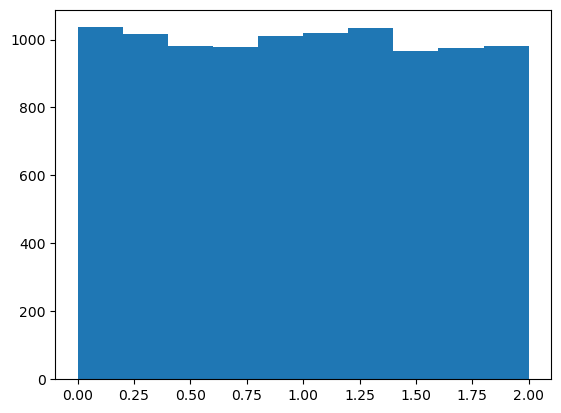

In [14]:
plt.hist(parameters_bare["A0"].flatten())

## Plot analysis of test runs

define functions and some basic arrays for further processing

In [15]:
def plot_histogram_offset(
    ax, data, bins, density=False, width=None, offset=0, **kwargs
):
    counts, _ = np.histogram(data, bins=bins, density=density)
    ax.bar(bins[:-1] + offset, counts, width=width, align="edge", **kwargs)


bins_fields = np.linspace(-0.5, 2.5, 4)
fields_match = (
    parameters["truth"]["matched"]["n_fields"] == parameters["truth"]["n_fields"]
)
w = 0.2

### Distribution of place field parameters from surrogate data

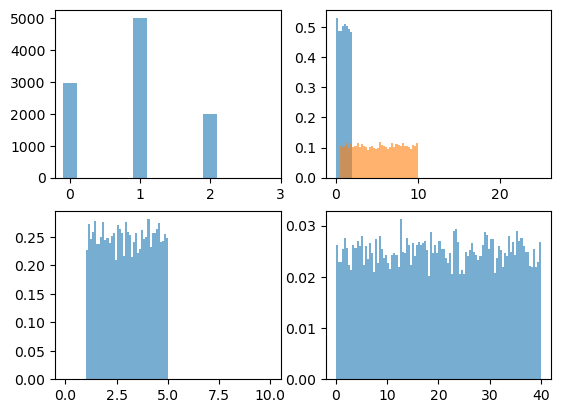

In [16]:
fig = plt.figure()

nbin = 40
ax = fig.add_subplot(221)
plot_histogram_offset(
    ax,
    parameters["truth"]["n_fields"],
    bins=bins_fields,
    width=w,
    offset=0.4,
    alpha=0.6,
    label="peak",
    color="tab:blue",
)

methods = ["peak", "information", "bayesian"]
PCs = parameters["truth"]["n_fields"] > 0


def get_method_performance(method, idxes=None):
    true_positives = PCs[idxes] & is_PC[f"{method}_method"][idxes]
    false_negatives = PCs[idxes] & ~is_PC[f"{method}_method"][idxes]
    true_negatives = ~PCs & ~is_PC[f"{method}_method"]
    false_positives = ~PCs & is_PC[f"{method}_method"]

    counts = {
        "TN": true_negatives.sum(),
        "FN": false_negatives.sum(),
        "TP": true_positives.sum(),
        "FP": false_positives.sum(),
    }

    evals = {
        "sensitivity": counts["TP"] / (counts["TP"] + counts["FN"]),
        "specificity": counts["TN"] / (counts["TN"] + counts["FP"]),
        "precision": counts["TP"] / (counts["TP"] + counts["FP"]),
    }
    evals["f1"] = (
        2
        * (evals["precision"] * evals["sensitivity"])
        / (evals["precision"] + evals["sensitivity"])
    )
    return counts, evals


def plot_numbers(ax, idxes):

    w = 0.15
    if idxes is None:
        idxes = np.ones(parameters_bare["n_fields"].shape[0], "bool")
    idx_1 = idxes & (parameters["truth"]["n_fields"] == 1)
    idx_2 = idxes & (parameters["truth"]["n_fields"] == 2)
    bottom = np.zeros(3)
    ax.bar(
        [-3 * w / 2.0, 1 - 3 * w / 2.0, 2 - 3 * w / 2.0],
        [(~PCs).sum(), PCs[idx_1].sum(), PCs[idx_2].sum()],
        color=["tab:green", "tab:green"],
        bottom=bottom,
        width=w,
        label="groundtruth",
        alpha=0.8,
    )

    colors = ["tab:blue", "tab:red", "tab:purple"]
    for m, method in enumerate(methods):
        counts, evals = get_method_performance(method, idxes)
        counts1, evals = get_method_performance(method, idx_1)
        counts2, evals = get_method_performance(method, idx_2)

        ax.bar(
            [-w / 2.0 + m * w, 1 - w / 2.0 + m * w, 2 - w / 2.0 + m * w],
            [counts["TN"], counts1["TP"], counts2["TP"]],
            color=colors[m],
            bottom=bottom,
            width=w,
            label=method,
            alpha=0.6,
        )
        ax.axhline(0, color="k", lw=0.5)
        ax.bar(
            [-w / 2.0 + m * w, 1 - w / 2.0 + m * w, 2 - w / 2.0 + m * w],
            [
                -counts["FN"],
                -counts1["FP"],
                -counts2["FP"] if method == "bayesian" else 0,
            ],
            color=colors[m],
            bottom=bottom,
            width=w,
            alpha=0.4,
        )

    ax.bar(
        [1 - w / 2.0 + m * w, 2 - w / 2.0 + m * w],
        [fields_match[idx_1].sum(), fields_match[idx_2].sum()],
        color=colors[2],
        bottom=bottom[:2],
        width=w,
        alpha=0.8,
    )

    plt.setp(
        ax, xticks=[0, 1, 2], xticklabels=["nPC", "PC (1)", "PC (2)"], ylabel="count"
    )
    ax.spines[["top", "right"]].set_visible(False)


# ax.hist(parameters['truth']['n_fields'],bins=np.arange(4)-w/2,width=w,align='mid')
plt.setp(ax, xticks=np.linspace(0, 3, 4))

ax = fig.add_subplot(222)
max_val = 25.0

bins = np.linspace(0, max_val, 101)
ax.hist(parameters["truth"]["A0"], bins=bins, density=True, alpha=0.6)
A = parameters_bare["A"].flatten()
ax.hist(A, bins=bins, density=True, alpha=0.6)
# ax.hist(parameters['truth']['matched']['A'][:,1],bins=bins,density=True,alpha=0.6)

ax = fig.add_subplot(223)
sigma = parameters_bare["sigma"].flatten()
ax.hist(sigma, bins=np.linspace(0, 10, 101), density=True, alpha=0.6)

ax = fig.add_subplot(224)
theta = parameters_bare["theta"].flatten()
ax.hist(theta, bins=np.linspace(0, nbin, 101), density=True, alpha=0.6)

plt.show(block=False)

In [195]:
is_PC["peak_method"]

array([False, False,  True, ..., False, False, False])

### Analyze parameter-dependent inference results of Bayesian analysis 

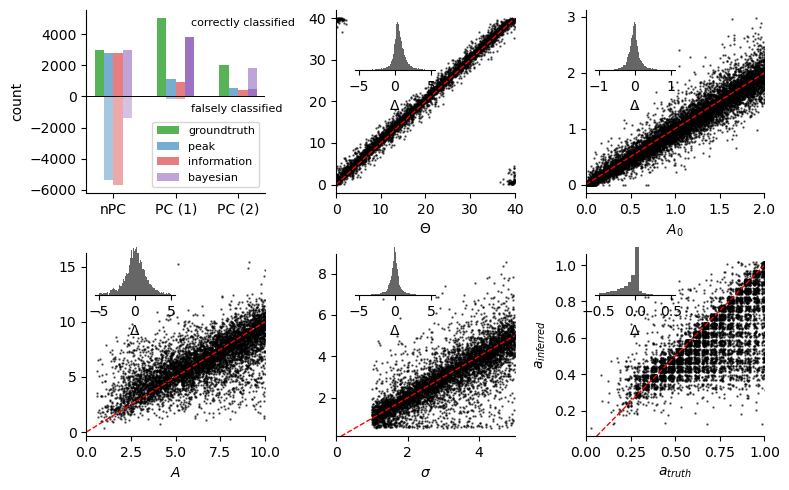

In [ ]:
fig = plt.figure(figsize=(8, 5))

ax_detection_rate = fig.add_subplot(231)
plot_numbers(ax_detection_rate, idxes=None)
ax_detection_rate.legend(fontsize=8)
ax_detection_rate.text(1.25, -1000, "falsely classified", fontsize=8)
ax_detection_rate.text(1.25, 4500, "correctly classified", fontsize=8)


def plot_inferred_parameters(
    ax, ax_hist, key, range, range_hist, indexes=None, dither=None
):

    reference_parameters = (
        parameters["truth"][key[0]]  # [...,np.newaxis]
        if key[0] == "A0"
        else parameters["truth"]["matched"][key[0]]
    )
    inferred_parameters = (
        parameters["inferred"][key[0]]  # [...,np.newaxis]
        if key[0] == "A0"
        else parameters["inferred"]["matched"][key[0]]
    )

    if (indexes is not None) and (key[0] == "A0"):
        indexes = np.any(indexes, axis=1)
    if indexes is None:
        indexes = np.isfinite(reference_parameters)
    # reference_parameters = reference_parameters[indexes]
    # inferred_parameters = inferred_parameters[indexes]

    if dither is not None:
        n_cells = np.prod(indexes.shape[0])
        # print(n_cells,indexes.shape)
        # print(reference_parameters.shape,inferred_parameters.shape)
        scatter = (np.random.rand(*indexes.shape, 2) - 1 / 2.0) * dither
    else:
        scatter = np.zeros(2)

    # print(scatter.shape, reference_parameters.shape)

    ax.axline((1, 1), slope=1, color="r", ls="--", lw=1)
    ax.scatter(
        (scatter[..., 0] + reference_parameters)[indexes],
        (scatter[..., 1] + inferred_parameters)[indexes],
        alpha=0.6,
        s=0.5,
        c="k",
    )

    plt.setp(ax, xlabel=f"${key[1]}$", xlim=range)

    dParameter = inferred_parameters[indexes] - reference_parameters[indexes]
    dParameter = dParameter[np.isfinite(dParameter)]
    ax_hist.hist(dParameter, bins=range_hist, density=True, alpha=0.6, color="k")


# indexes = parameters_bare['A']/parameters_bare['A0'][:,np.newaxis] > 5.
indexes = None

ax_theta = fig.add_subplot(232)
ax_theta_hist = fig.add_subplot([0.45, 0.85, 0.1, 0.1])
plot_inferred_parameters(
    ax_theta,
    ax_theta_hist,
    ["theta", "\Theta"],
    range=[0, 40],
    range_hist=np.linspace(-5, 5, 101),
    indexes=indexes,
)

ax_baseline = fig.add_subplot(233)
ax_baseline_hist = fig.add_subplot([0.75, 0.85, 0.1, 0.1])
plot_inferred_parameters(
    ax_baseline,
    ax_baseline_hist,
    ["A0", "A_0"],
    range=[0, 2],
    range_hist=np.linspace(-1, 1, 101),
    indexes=indexes,
)

ax_amplitude = fig.add_subplot(234)
ax_amplitude_hist = fig.add_subplot([0.125, 0.4, 0.1, 0.1])
plot_inferred_parameters(
    ax_amplitude,
    ax_amplitude_hist,
    ["A", "A"],
    range=[0, 10],
    range_hist=np.linspace(-5, 5, 101),
    indexes=indexes,
)

ax_sigma = fig.add_subplot(235)
ax_sigma_hist = fig.add_subplot([0.45, 0.4, 0.1, 0.1])
plot_inferred_parameters(
    ax_sigma,
    ax_sigma_hist,
    ["sigma", "\sigma"],
    range=[0, 5],
    range_hist=np.linspace(-5, 5, 101),
    indexes=indexes,
)

ax_reliability = fig.add_subplot(236)
ax_reliability_hist = fig.add_subplot([0.75, 0.4, 0.1, 0.1])
plot_inferred_parameters(
    ax_reliability,
    ax_reliability_hist,
    ["reliability", "a"],
    range=[0, 1],
    range_hist=np.linspace(-0.5, 0.5, 21),
    dither=0.75 / surrogate_data.behavior["trial_ct"],
    indexes=indexes,
)
plt.setp(ax_reliability, xlabel="$a_{truth}$", ylabel="$a_{inferred}$")


for axx in [
    ax_detection_rate,
    ax_theta,
    ax_baseline,
    ax_amplitude,
    ax_sigma,
    ax_reliability,
]:
    axx.spines[["top", "right"]].set_visible(False)

for axx in [
    ax_theta_hist,
    ax_baseline_hist,
    ax_amplitude_hist,
    ax_sigma_hist,
    ax_reliability_hist,
]:
    axx.spines[["top", "right", "left"]].set_visible(False)
    plt.setp(axx, yticks=[], xlabel="$\Delta$")


# ax = fig.add_subplot([0.6,0.35,0.1,0.1])
# dTheta = parameters['truth']['matched']['theta'] - parameters['inferred']['matched']['theta']
# dTheta = dTheta[np.isfinite(dTheta)]
# ax.hist(dTheta,bins=np.linspace(-5,5,101),density=True,alpha=0.6)
# ax.hist(np.abs(parameters['truth']['matched']['theta'][:,0]-parameters['inferred']['matched']['theta'][:,0]),bins=np.linspace(0,5,101),density=True,cumulative=True,histtype='step',color='k')

# ax.hist(np.abs(parameters['truth']['matched']['theta'][:,1]-parameters['inferred']['matched']['theta'][:,1]),bins=np.linspace(0,5,101),density=True,alpha=0.6)
# ax.hist(np.abs(parameters['truth']['matched']['theta'][:,1]-parameters['inferred']['matched']['theta'][:,1]),bins=np.linspace(0,5,101),density=True,cumulative=True,histtype='step',color='k')
plt.tight_layout()
plt.show(block=False)

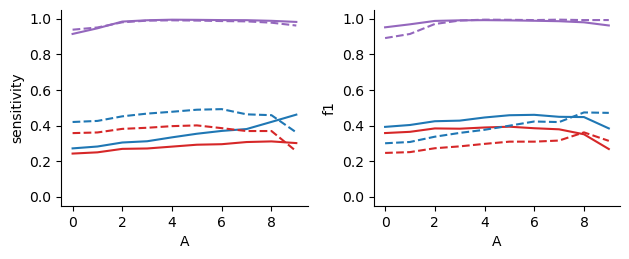

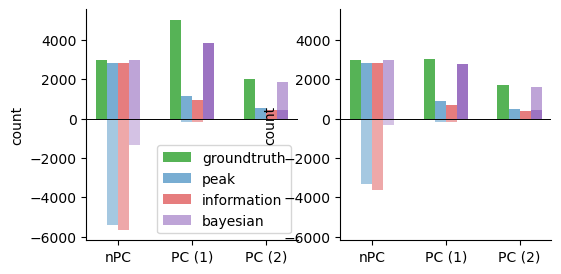

In [ ]:
"""
    [ ] add possibility to add indices -> remove bad amplitudes, etc and check again.
[ ] make proper plot (+/- axis in detection?)
[ ] do for all methods
[ ] make nice plot (as first subplot!)
"""

# nPCs = parameters["truth"]["n_fields"] == 0

methods = ["peak", "information", "bayesian"]
steps = 11
sensitivity = np.zeros((steps, 3))
specificity = np.zeros((steps, 3))
precision = np.zeros((steps, 3))
f1 = np.zeros((steps, 3))

key = "A"
val_array = np.linspace(0, 10, steps)
# val_array = np.linspace(0,1,steps)
for i, val in enumerate(val_array):

    idxes = np.any(
        (parameters_bare[key] > val) & (parameters_bare["reliability"] > 0.5)
        # & (parameters_bare['sigma']>2.)
        # & (parameters_bare['n_fields'][:,np.newaxis]==1)
        & (parameters_bare["A0"][:, np.newaxis] < 0.5),
        axis=1,
    )
    # idxes = None
    for m, method in enumerate(methods):
        counts, evals = get_method_performance(method, idxes)
        sensitivity[i, m], specificity[i, m], precision[i, m], f1[i, m] = evals.values()


colors = ["tab:blue", "tab:red", "tab:purple"]
from cycler import cycler

fig = plt.figure()
ax_sensitivity = plt.subplot(221)
ax_sensitivity.set_prop_cycle(cycler("color", colors))
ax_sensitivity.plot(val_array, sensitivity, label=methods)
plt.setp(ax_sensitivity, ylim=[-0.05, 1.05], xlabel="A", ylabel="sensitivity")
ax_sensitivity.spines[["top", "right"]].set_visible(False)

# ax = plt.subplot(222)
# ax.plot(val_array, specificity, label=methods)
# plt.setp(ax, ylim=[-0.05, 1.05],title='specificity')
# ax.spines[['top','right']].set_visible(False)

# ax = plt.subplot(223)
# ax.plot(val_array, precision, label=methods)
# plt.setp(ax, ylim=[-0.05, 1.05],title='precision')
# ax.spines[['top','right']].set_visible(False)


ax_f1 = plt.subplot(222)
ax_f1.set_prop_cycle(cycler("color", colors))
ax_f1.plot(val_array, f1, label=methods)
plt.setp(ax_f1, ylim=[-0.05, 1.05], xlabel="A", ylabel="f1")
ax_f1.spines[["top", "right"]].set_visible(False)


key = "A"
val_array = np.linspace(0, 10, steps)
# val_array = np.linspace(0,1,steps)
for i, val in enumerate(val_array):

    idxes = np.any(
        (parameters_bare[key] > val) & (parameters_bare["reliability"] > 0.9)
        # & (parameters_bare['sigma']>2.)
        # & (parameters_bare['n_fields'][:,np.newaxis]==1)
        # & (parameters_bare['A0'][:,np.newaxis]<0.5)
        ,
        axis=1,
    )
    # idxes = None
    for m, method in enumerate(methods):
        counts, evals = get_method_performance(method, idxes)
        sensitivity[i, m], specificity[i, m], precision[i, m], f1[i, m] = evals.values()
ax_sensitivity.plot(val_array, f1, linestyle="--")
ax_f1.plot(val_array, sensitivity, linestyle="--")


ax.legend()
plt.tight_layout()


fig = plt.figure(figsize=(6, 3))
ax_numbers = fig.add_subplot(121)
plot_numbers(ax_numbers, idxes=None)
ax_numbers.legend()

# plt.setp(ax_numbers,ylim=[-500,5000])
idxes = np.any(
    # (parameters_bare["A0"][:,np.newaxis] < .5) & (parameters_bare["reliability"] > 0.5),
    (parameters_bare["A"] > 2.0) & (parameters_bare["reliability"] > 0.5),
    axis=1,
)

ax_numbers2 = fig.add_subplot(122, sharey=ax_numbers)
plot_numbers(ax_numbers2, idxes=idxes)
idxes = None

neurons considered: 5850
neurons considered: 4278
neurons considered: 2757


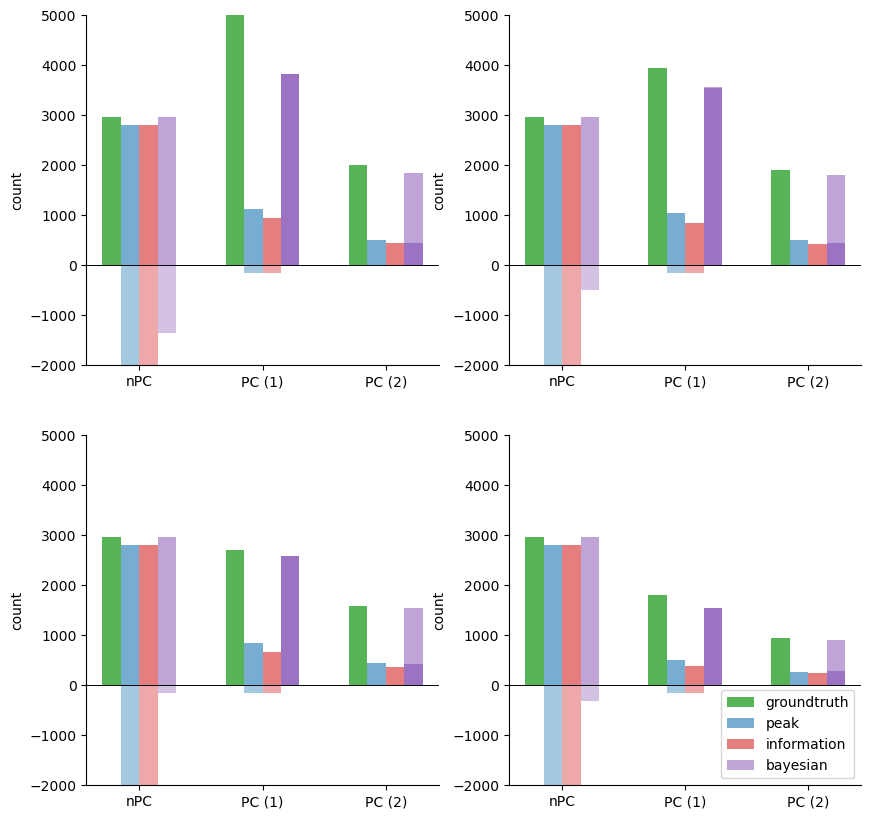

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax_numbers = fig.add_subplot(221)

plot_numbers(ax_numbers, idxes=None)

ax_2 = fig.add_subplot(222, sharey=ax_numbers)
idxes = np.any(
    (parameters_bare["A"] > 2.5),
    axis=1,
)
plot_numbers(ax_2, idxes=idxes)
print(f"neurons considered: {idxes.sum()}")

ax_3 = fig.add_subplot(223, sharey=ax_numbers)
# plt.setp(ax_numbers,ylim=[-500,5000])
idxes = np.any(
    # (parameters_bare["A0"][:,np.newaxis] < .5) & (parameters_bare["reliability"] > 0.5),
    (parameters_bare["A"] > 2.5)
    & (parameters_bare["A"] / parameters_bare["A0"][:, np.newaxis] > 2.0)
    & (parameters_bare["reliability"] > 0.5),
    axis=1,
)
plot_numbers(ax_3, idxes=idxes)
print(f"neurons considered: {idxes.sum()}")

ax_4 = fig.add_subplot(224, sharey=ax_numbers)
idxes = np.any(
    (parameters_bare["A0"][:, np.newaxis] < 1.0)
    & (parameters_bare["reliability"] > 0.5),
    axis=1,
)
plot_numbers(ax_4, idxes=idxes)
print(f"neurons considered: {idxes.sum()}")
plt.setp(ax_numbers, ylim=[-2000, 5000])
ax_4.legend(loc="lower right")
idxes = None

In [ ]:
idx_interesting = (
    results["status"]["is_place_cell"]["peak_method"]
    & ~results["status"]["is_place_cell"]["bayesian_method"]
)

idx_interesting = (
    results["status"]["is_place_cell"]["information_method"]
    & ~results["status"]["is_place_cell"]["bayesian_method"]
)

PCs = parameters["truth"]["n_fields"] > 0
# PCs
# results["status"]["is_place_cell"]
idx_interesting.sum(), (idx_interesting & PCs).sum()

(268, 109)

2967


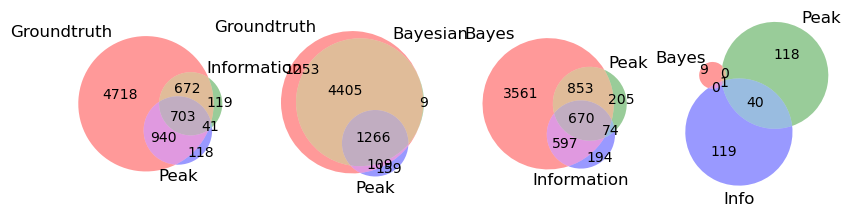

In [ ]:
from matplotlib_venn import venn3

idxes = np.any(
    (parameters_bare["A"] > 2.0),  # & (parameters_bare["reliability"] > 0.5),
    # (parameters_bare["A"] / parameters_bare["A0"][:, np.newaxis] > 1.5),
    # parameters["truth"]["n_fields"][:,np.newaxis] ==1,
    axis=1,
)
idxes = None

isPC_peak = results["status"]["is_place_cell"]["peak_method"][idxes]
isPC_bayes = results["status"]["is_place_cell"]["bayesian_method"][idxes]
isPC_info = results["status"]["is_place_cell"]["information_method"][idxes]
isPC_gt = parameters["truth"]["n_fields"][idxes] > 0

# Pbi = (isPC_peak & ~isPC_bayes & ~isPC_info).sum()
# PBi = (isPC_peak & isPC_bayes & ~isPC_info).sum()
# PBI = (isPC_peak & isPC_bayes & isPC_info).sum()
# PbI = (isPC_peak & ~isPC_bayes & isPC_info).sum()
# pbi = (~isPC_peak & ~isPC_bayes & ~isPC_info).sum()
# pBi = (~isPC_peak & isPC_bayes & ~isPC_info).sum()
# pBI = (~isPC_peak & isPC_bayes & isPC_info).sum()
# pbI = (~isPC_peak & ~isPC_bayes & isPC_info).sum()


def draw_venn3(ax, A, B, C=None, names=[]):

    if C is None:
        AB = (A & B).sum()
        aB = (~A & B).sum()
        Ab = (A & ~B).sum()
        ab = (~A & ~B).sum()
        venn2(ax=ax, subsets=(Ab, aB, AB), set_labels=names)
    else:
        ABC = (A & B & C).sum()
        ABc = (A & B & ~C).sum()
        AbC = (A & ~B & C).sum()
        Abc = (A & ~B & ~C).sum()
        aBC = (~A & B & C).sum()
        aBc = (~A & B & ~C).sum()
        abC = (~A & ~B & C).sum()
        abc = (~A & ~B & ~C).sum()
        venn3(ax=ax, subsets=(Abc, aBc, ABc, abC, AbC, aBC, ABC), set_labels=names)


fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(141)
draw_venn3(ax1, isPC_gt, isPC_info, isPC_peak, ("Groundtruth", "Information", "Peak"))
ax2 = fig.add_subplot(142)
draw_venn3(
    ax2, isPC_gt, isPC_bayes, isPC_info, names=("Groundtruth", "Bayesian", "Peak")
)
ax3 = fig.add_subplot(143)
draw_venn3(ax3, isPC_bayes, isPC_peak, isPC_info, ("Bayes", "Peak", "Information"))

idxes_nPC = parameters["truth"]["n_fields"] == 0

# idxes = idxes_nPC if idxes is None else idxes & idxes_nPC
# print(idxes.shape)

isPC_peak = results["status"]["is_place_cell"]["peak_method"][idxes_nPC]
isPC_bayes = results["status"]["is_place_cell"]["bayesian_method"][idxes_nPC]
isPC_info = results["status"]["is_place_cell"]["information_method"][idxes_nPC]
# isPC_gt = parameters["truth"]["n_fields"][idxes] > 0
ax4 = fig.add_subplot(144)
draw_venn3(ax4, isPC_bayes, isPC_peak, isPC_info, ("Bayes", "Peak", "Info"))

print(idxes_nPC.sum())
# plt.savefig("venn_diagram_2.svg")

idxes = None
# idx_peak_bayes = (results["status"]["is_place_cell"]["peak_method"] & results["status"]["is_place_cell"]["bayesian_method"]).sum()
# idx_peak_info = (results["status"]["is_place_cell"]["peak_method"] & results["status"]["is_place_cell"]["information_method"]).sum()
# idx_peak_bayes_info = (results["status"]["is_place_cell"]["peak_method"] & results["status"]["is_place_cell"]["information_method"] & results["status"]["is_place_cell"]["bayesian_method"]).sum()
# idx_bayes = results["status"]["is_place_cell"]["bayesian_method"].sum()
# idx_bayes_info = (results["status"]["is_place_cell"]["information_method"] & results["status"]["is_place_cell"]["bayesian_method"]).sum()
# idx_info = results["status"]["is_place_cell"]["information_method"].sum()

# print(Pbi, PBi, PBI, pbi, pBi, pBI, pbI)
# # print(idx_bayes, idx_peak_bayes, idx_peak)

# venn3(
# subsets=(Pbi, pBi, PBi, pbI, PbI, pBI, PBI),
#     set_labels=("Peak", "Bayes", "Information"),
# )

In [ ]:
1362 - 75 - 34 - 87

1166

In [ ]:
is_interesting = (
    results["status"]["is_place_cell"]["peak_method"]
    & ~results["status"]["is_place_cell"]["bayesian_method"]
    & parameters["truth"]["n_fields"][idxes]
    > 0
)

print(is_interesting.sum())

106


(array([[0., 2., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 2.,
         0., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 2., 0., 0., 1.,
         1., 0., 1., 0., 3.],
        [0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 2., 0., 0., 0., 1., 0.,
         2., 1., 0., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 2., 0., 2., 0., 0., 0.,
         0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 3.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         1., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 2., 0.,
         1., 0., 1., 0., 2.],
        [1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
         0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,


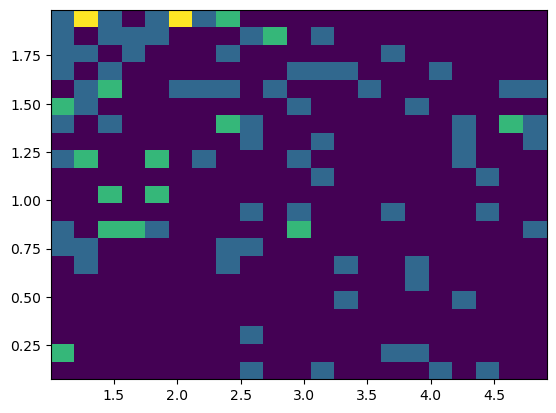

In [ ]:
plt.hist2d(
    parameters_bare["sigma"][idx_interesting, 0],
    parameters_bare["A0"][idx_interesting, ...],
    bins=21,
)

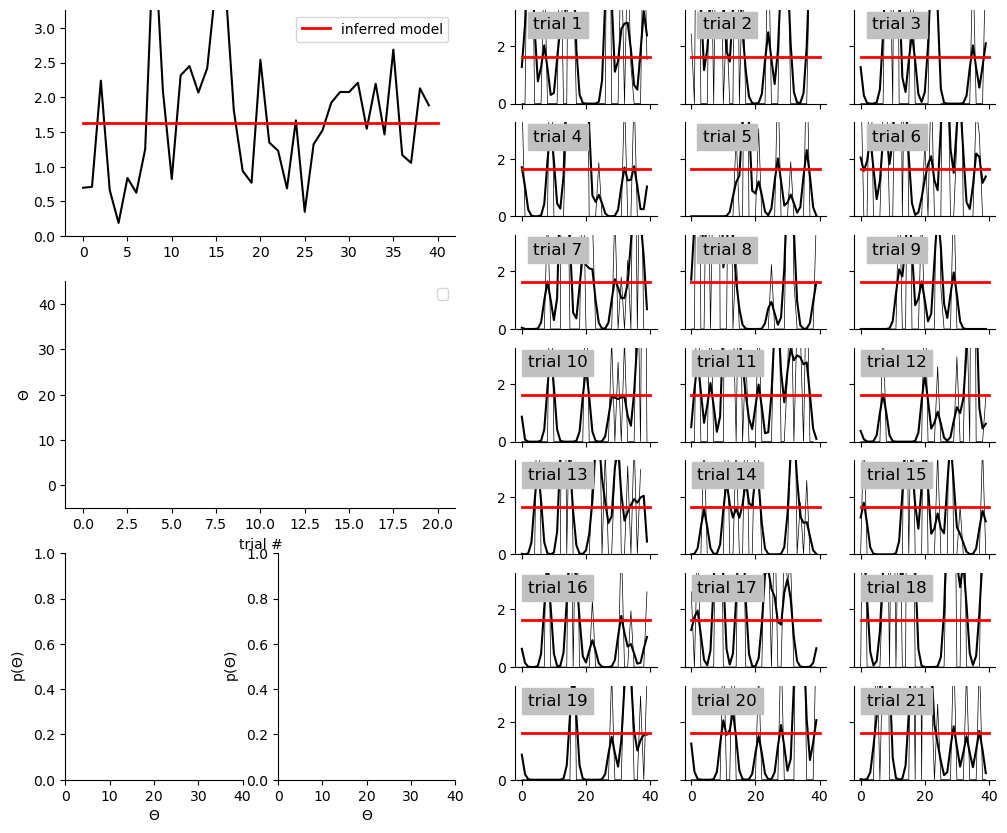

In [188]:
from placefield_dynamics.placefield_detection.analyze_results import display_results

idx_interesting = np.where(is_interesting)[1]
i = 2
display_results(results, idx_interesting[i])

In [21]:
fields_match = parameters["truth"]["matched"]["n_fields"] == parameters_bare["n_fields"]
print((fields_match & (parameters_bare["n_fields"] > 0))[idxes].sum())
(parameters["inferred"]["n_fields"] == 2).sum()
(parameters["truth"]["n_fields"] == 2).sum()

# (parameters_bare['n_fields']==2).sum()

4278


2012

In [199]:
indexes.shape + (2,)

AttributeError: 'NoneType' object has no attribute 'shape'

In [22]:
# fig = plt.figure()
# ax = fig.add_subplot(221)
# ax.hist(np.abs(parameters['truth']['nonmatched']['theta'][:,0],parameters['inferred']['A0']),bins=np.linspace(0,5,101),density=True,alpha=0.6)

n_modes_match = parameters["inferred"]["n_fields"] == parameters["truth"]["n_fields"]

fields_match = (
    parameters["truth"]["matched"]["n_fields"] == parameters["truth"]["n_fields"]
)

print(
    f"same number of modes: {n_modes_match.sum()}, all modes correct: {fields_match.sum()}"
)

same number of modes: 7245, all modes correct: 7245


In [23]:
print(parameters["inferred"]["n_fields"])
print(parameters["truth"]["n_fields"])

[0 0 1 ... 1 1 0]
[0 1 1 ... 1 2 0]


In [24]:
failed_2mode = np.logical_and(
    parameters["truth"]["n_fields"] == 2,
    parameters["truth"]["matched"]["n_fields"] != 2,
)
failed_2mode_0 = np.logical_and(failed_2mode, results["fields"]["n_modes"] == 0)
failed_2mode_1 = np.logical_and(failed_2mode, results["fields"]["n_modes"] == 1)
failed_2mode_2 = np.logical_and(failed_2mode, results["fields"]["n_modes"] == 2)

failed_1mode = np.logical_and(
    parameters["truth"]["n_fields"] == 1, results["fields"]["n_modes"] != 1
)
failed_1mode_0 = np.logical_and(failed_1mode, results["fields"]["n_modes"] == 0)
failed_1mode_1 = np.logical_and(failed_1mode, results["fields"]["n_modes"] == 1)
failed_1mode_2 = np.logical_and(failed_1mode, results["fields"]["n_modes"] == 2)

failed_0mode_1 = np.logical_and(
    parameters["truth"]["n_fields"] == 0, parameters["inferred"]["n_fields"] == 1
)
failed_0mode_2 = np.logical_and(
    parameters["truth"]["n_fields"] == 0, results["fields"]["n_modes"] == 2
)

print(
    f"Failed 2 mode: {failed_2mode.sum()},\t 0 mode: {failed_2mode_0.sum()}, \t 1 mode: {failed_2mode_1.sum()}, \t 2 mode: {failed_2mode_2.sum()}"
)
print(
    f"Failed 1 mode: {failed_1mode.sum()},\t 0 mode: {failed_1mode_0.sum()}, \t 1 mode: {failed_1mode_1.sum()}, \t 2 mode: {failed_1mode_2.sum()}"
)
print(f"Failed 0 mode: {failed_0mode_1.sum()}, \t 2 mode: {failed_0mode_2.sum()}")

true_nonPC = np.logical_and(
    parameters["truth"]["n_fields"] == 0, parameters["inferred"]["n_fields"] == 0
)
true_nonPC.sum()

Failed 2 mode: 1557,	 0 mode: 174, 	 1 mode: 1378, 	 2 mode: 5
Failed 1 mode: 1193,	 0 mode: 1188, 	 1 mode: 0, 	 2 mode: 5
Failed 0 mode: 10, 	 2 mode: 0


2957

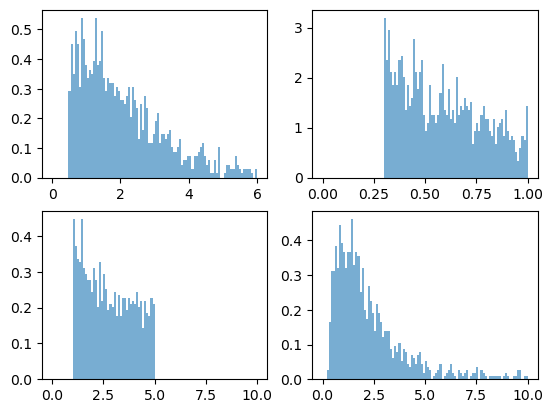

In [25]:
fig = plt.figure()
ax = fig.add_subplot(221)
ax.hist(
    parameters_bare["A"][failed_1mode_0, :].flatten(),
    bins=np.linspace(0, 6, 101),
    density=True,
    alpha=0.6,
)

ax = fig.add_subplot(222)
ax.hist(
    parameters_bare["reliability"][failed_1mode_0, :].flatten(),
    bins=np.linspace(0, 1, 101),
    density=True,
    alpha=0.6,
)

ax = fig.add_subplot(223)
ax.hist(
    parameters_bare["sigma"][failed_1mode_0, :].flatten(),
    bins=np.linspace(0, 10, 101),
    density=True,
    alpha=0.6,
)

ax = fig.add_subplot(224)
ax.hist(
    (
        parameters_bare["A"][failed_1mode_0, :]
        / parameters_bare["A0"][failed_1mode_0, np.newaxis]
    ).flatten(),
    bins=np.linspace(0, 10, 101),
    density=True,
    alpha=0.6,
)
plt.show()

In [26]:
from scipy.special import erf
from utils.utils_analysis import gauss_smooth


def norm_cdf(x, mu, sigma):
    return 0.5 * (1.0 + erf((x - mu) / (np.sqrt(2) * sigma)))


all_2modes = parameters_bare["n_fields"] == 2
nbin = 40
close_threshold = [0.3, 0.5]

overlap = np.full((n_cells, 2), np.NaN)
d_theta = np.full(n_cells, np.NaN)
idx_overlap = np.zeros(n_cells, "bool")
for n in np.where(all_2modes)[0]:

    d_theta[n] = (
        np.mod(np.diff(parameters_bare["theta"][n, :]) + nbin / 2, nbin) - nbin / 2
    )
    overlap_range = -abs(d_theta[n]) + 2 * parameters_bare["sigma"][n, :].sum()

    for f in range(2):
        overlap[n, f] = norm_cdf(
            overlap_range - 2 * parameters_bare["sigma"][n, f],
            0,
            parameters_bare["sigma"][n, f],
        )

    if np.all(overlap[n, :] > close_threshold[0]) and np.any(
        overlap[n, :] > close_threshold[1]
    ):

        # print(f"neuron {n} failed to detect 2 modes, dTheta={d_theta[n]} overlap: {overlap[n]}")
        # print(f"neuron {n} failed to detect 2 modes, dTheta={theta_2-theta_1} overlap: {ol_1} and {ol_2}")
        idx_overlap[n] = True

idx_detected = fields_match & (parameters_bare["n_fields"] == 2)
idx_separated = failed_2mode_1 & ~idx_overlap

print(f"too close: {idx_overlap.sum()}")


def plot_vars(ax, var, bins, idx_good=None, idx_medium=None, idx_bad=None):

    params_matched = (
        parameters["truth"] if var == "A0" else parameters["truth"]["matched"]
    )
    params_nonmatched = (
        parameters["truth"] if var == "A0" else parameters["truth"]["nonmatched"]
    )

    fact = 1 if var == "A0" else 2

    vals = np.full((2 * n_cells, 3), np.NaN)
    vals[: fact * idx_bad.sum(), 0] = params_nonmatched[var][idx_bad].flatten()
    if idx_medium is not None:
        vals[: fact * idx_medium.sum(), 1] = params_nonmatched[var][
            idx_medium
        ].flatten()
    vals[: fact * idx_good.sum(), 2] = params_matched[var][idx_good].flatten()

    if var == "A0":
        print(vals)

    ax.hist(
        vals,
        bins=bins,
        alpha=0.6,
        color=["tab:red", "tab:olive", "tab:green"],
        label=["separated", "overlapping", "detected"],
        histtype="bar",
        stacked=True,
    )

    values = np.full((len(bins) - 1, 3), np.NaN)
    for i in range(3):
        values[:, i], x = np.histogram(vals[:, i], bins=bins)

    plt.setp(ax, xlabel=var, yticks=[])
    ax.spines[["top", "left", "right"]].set_visible(False)

    ax_fraction = ax.twinx()
    ax_fraction.plot(
        bins[:-1],
        gauss_smooth(values[:, 0] / values.sum(axis=1), 1, mode="constant"),
        color="tab:red",
        label="separated",
    )
    if idx_medium is not None:
        ax_fraction.plot(
            bins[:-1],
            gauss_smooth(values[:, 1] / values.sum(axis=1), 1, mode="constant"),
            color="k",
            label="overlapping",
        )
    plt.setp(ax_fraction, ylim=[0, 1])
    ax_fraction.spines[["top", "left"]].set_visible(False)


def get_filtered_values(val, idx_good, idx_bad, idx_medium=None):

    if val == "A0":
        matched = parameters["truth"][val][..., np.newaxis]
        nonmatched = parameters["truth"][val][..., np.newaxis]
    else:
        matched = parameters["truth"]["matched"][val]
        nonmatched = parameters["truth"]["nonmatched"][val]

    filtered_dict = {
        "good": matched[idx_good, ...],
        "bad": nonmatched[idx_bad, ...],
    }
    if idx_medium is not None:
        filtered_dict["medium"] = nonmatched[idx_medium, ...]
    return filtered_dict

too close: 657


[[0.01558332 0.82138013 0.64211736]
 [0.67702105 1.77550355 1.1451573 ]
 [1.11342386 1.79408072 0.86161491]
 ...
 [       nan        nan        nan]
 [       nan        nan        nan]
 [       nan        nan        nan]]


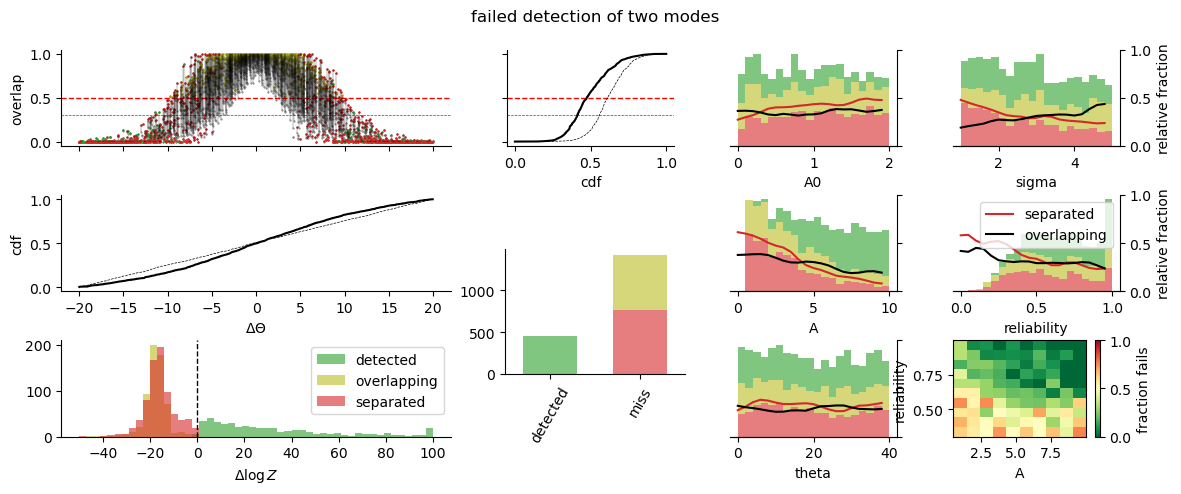

In [27]:
from utils import ecdf

gs = plt.GridSpec(3, 5)
fig = plt.figure(figsize=(12, 5))
ax_close = fig.add_subplot(gs[0, :2])
ax_close.axhline(close_threshold[0], color="r", ls="--", lw=0.5)
ax_close.axhline(close_threshold[1], color="r", ls="--", lw=1)
ax_close.plot(
    np.tile(d_theta[np.newaxis, :], (2, 1)),
    overlap.T,
    "-",
    linewidth=0.2,
    color="k",
    label="field 1",
)
ax_close.scatter(d_theta, overlap[:, 0], s=1, c="tab:grey", marker=".")
ax_close.scatter(d_theta, overlap[:, 1], s=1, c="tab:grey", marker=".")

# ax_close.scatter(d_theta,np.max(overlap,axis=1),s=1,c='k',marker='.')
ax_close.scatter(
    d_theta[idx_detected],
    np.max(overlap[idx_detected, :], axis=1),
    s=2,
    c="tab:green",
    marker=".",
)
ax_close.scatter(
    d_theta[idx_overlap],
    np.max(overlap[idx_overlap, :], axis=1),
    s=2,
    c="tab:olive",
    marker=".",
)
ax_close.scatter(
    d_theta[idx_separated],
    np.max(overlap[idx_separated, :], axis=1),
    s=2,
    c="tab:red",
    marker=".",
)

plt.setp(ax_close, ylabel="overlap")
plt.setp(ax_close.get_xticklabels(), visible=False)
ax_close.spines[["top", "right"]].set_visible(False)


ax_overlap = fig.add_subplot(gs[0, 2], sharey=ax_close)
ax_overlap.axhline(close_threshold[0], color="r", ls="--", lw=0.5)
ax_overlap.axhline(close_threshold[1], color="r", ls="--", lw=1)
x, y = ecdf(np.max(overlap[all_2modes, :], axis=1))
ax_overlap.plot(y, x, color="k", linestyle="--", linewidth=0.5)

x, y = ecdf(np.max(overlap[failed_2mode_1, :], axis=1))
ax_overlap.plot(y, x, color="k")

plt.setp(ax_overlap, xlabel="cdf")
plt.setp(ax_overlap.get_yticklabels(), visible=False)
ax_overlap.spines[["top", "right"]].set_visible(False)

ax_theta = fig.add_subplot(gs[1, :2], sharex=ax_close)
x, y = ecdf(d_theta[all_2modes])
ax_theta.plot(x, y, color="k", linestyle="--", linewidth=0.5)

x, y = ecdf(d_theta[failed_2mode_1])
ax_theta.plot(x, y, color="k")

plt.setp(ax_theta, xlabel="$\Delta\Theta$", ylabel="cdf")

ax_numbers = fig.add_subplot([0.425, 0.25, 0.15, 0.25])
numbers = [idx_detected.sum(), idx_separated.sum()]

bottom = np.zeros(2)

ax_numbers.bar(
    [0, 1],
    numbers,
    color=["tab:green", "tab:red"],
    bottom=bottom,
    width=0.6,
    label=[None, "separated"],
    alpha=0.6,
)
ax_numbers.bar(
    [1],
    idx_overlap.sum(),
    color="tab:olive",
    bottom=numbers[1],
    width=0.6,
    label="overlapping",
    alpha=0.6,
)
plt.setp(
    ax_numbers, xticks=[0, 1], xticklabels=["detected", "miss"], xlim=[-0.5, 1.5]
)  # ,ylim=[0,800])
plt.setp(ax_numbers.xaxis.get_majorticklabels(), rotation=60)

# 'separated'
# ax_numbers.legend(fontsize=8,loc='lower left')

for axx in [ax_close, ax_overlap, ax_theta, ax_numbers]:
    axx.spines[["top", "right"]].set_visible(False)


dlogz = np.diff(results["fields"]["logz"][:, 1:, 0])
bins = np.linspace(-50, 100, 51)

ax = fig.add_subplot(gs[2, :2])
ax.axvline(0, color="k", ls="--", lw=1)
ax.hist(
    np.clip(
        dlogz[np.logical_and(all_2modes, results["fields"]["n_modes"] == 2)],
        a_min=None,
        a_max=100,
    ),
    bins=bins,
    alpha=0.6,
    color="tab:green",
    label="detected",
)  # ,bins=np.linspace(-10,10,101),density=True,alpha=0.6)
ax.hist(
    dlogz[
        np.logical_and(
            np.logical_and(all_2modes, results["fields"]["n_modes"] == 1), idx_overlap
        )
    ],
    bins=bins,
    alpha=0.6,
    color="tab:olive",
    label="overlapping",
)  # ,bins=np.linspace(-10,10,101),density=True,alpha=0.6)#
ax.hist(
    dlogz[
        np.logical_and(
            np.logical_and(all_2modes, results["fields"]["n_modes"] == 1), ~idx_overlap
        )
    ],
    bins=bins,
    alpha=0.6,
    color="tab:red",
    label="separated",
)  # ,bins=np.linspace(-10,10,101),density=True,alpha=0.6)

plt.setp(ax, xlabel="$\Delta \log Z$")
ax.legend()
ax.spines[["top", "right"]].set_visible(False)


plot_vars(
    fig.add_subplot(gs[0, 3]),
    "A0",
    np.linspace(0, 2, 21),
    idx_good=idx_detected,
    idx_medium=idx_overlap,
    idx_bad=idx_separated,
)
plt.setp(plt.gca(), yticklabels=[])

plot_vars(
    fig.add_subplot(gs[1, 3]),
    "A",
    np.linspace(0, 10, 21),
    idx_good=idx_detected,
    idx_medium=idx_overlap,
    idx_bad=idx_separated,
)
plt.setp(plt.gca(), yticklabels=[])

plot_vars(
    fig.add_subplot(gs[2, 3]),
    "theta",
    np.linspace(0, 40, 21),
    idx_good=idx_detected,
    idx_medium=idx_overlap,
    idx_bad=idx_separated,
)
plt.setp(plt.gca(), yticklabels=[])

plot_vars(
    fig.add_subplot(gs[0, 4]),
    "sigma",
    np.linspace(1, 5, 21),
    idx_good=idx_detected,
    idx_medium=idx_overlap,
    idx_bad=idx_separated,
)
plt.setp(plt.gca(), ylabel="relative fraction")

plot_vars(
    fig.add_subplot(gs[1, 4]),
    "reliability",
    np.linspace(0, 1.0, 21),
    idx_good=idx_detected,
    idx_medium=idx_overlap,
    idx_bad=idx_separated,
)
plt.setp(plt.gca(), ylabel="relative fraction")
plt.gca().legend()

steps = 10
keys = ["A", "reliability"]

x = get_filtered_values(keys[0], idx_detected, idx_separated, idx_medium=idx_overlap)
y = get_filtered_values(keys[1], idx_detected, idx_separated, idx_medium=idx_overlap)

x_array = np.linspace(
    np.nanmin(parameters_bare[keys[0]]), np.nanmax(parameters_bare[keys[0]]), steps + 1
)
y_array = np.linspace(
    np.nanmin(parameters_bare[keys[1]]), np.nanmax(parameters_bare[keys[1]]), steps + 1
)

A_ct = np.zeros((3, steps, steps))
for i in range(steps):
    for j in range(steps):
        for id, idx in enumerate(x.keys()):
            A_ct[id, i, j] = np.logical_and(
                (x[idx] > x_array[i]) & (x[idx] < x_array[i + 1]),
                (y[idx] > y_array[j]) & (y[idx] < y_array[j + 1]),
            ).sum()


ax = fig.add_subplot(gs[2, 4])
X, Y = np.meshgrid(x_array, y_array)
img = ax.pcolormesh(X, Y, A_ct[1, ...] / A_ct.sum(axis=0), cmap="RdYlGn_r", clim=[0, 1])
plt.setp(ax, ylabel=keys[1], xlabel=keys[0])

cbar = plt.colorbar(img)
cbar.set_label("fraction fails")


plt.suptitle("failed detection of two modes")
plt.tight_layout(h_pad=0.01, w_pad=0.01)

[[1.78901519        nan 0.33891343]
 [1.51982085        nan 0.16242032]
 [0.52107404        nan 1.11378803]
 ...
 [       nan        nan        nan]
 [       nan        nan        nan]
 [       nan        nan        nan]]
[[1.51982085        nan 0.16242032]
 [1.91577961        nan 1.11378803]
 [1.59781248        nan 0.46505668]
 ...
 [       nan        nan        nan]
 [       nan        nan        nan]
 [       nan        nan        nan]]


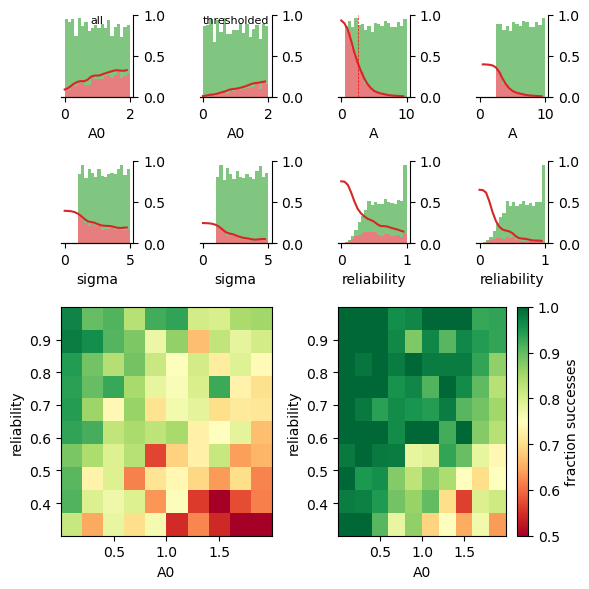

In [28]:
idx_good = fields_match & (parameters_bare["n_fields"] == 1)
idx_bad = failed_1mode_0

A_thr = 2.5
idx_pronounced_field = np.any(
    (parameters_bare["A"] > A_thr),
    # (
    #     parameters_bare["A"] / parameters_bare["A0"][..., np.newaxis] > 1.0
    # ),  # & (parameters_bare['sigma']>1.5) \
    # & (parameters_bare["reliability"] > 0.5),
    axis=1,
)
# idx_pronounced_field = np.any(parameters_bare["A"] / parameters_bare["A0"][...,np.newaxis] > 1.,axis=1)
idx_good_pronounced = (
    fields_match & (parameters_bare["n_fields"] == 1) & idx_pronounced_field
)
idx_bad_pronounced = failed_1mode_0 & idx_pronounced_field

fig = plt.figure(figsize=(6, 6))

gs = plt.GridSpec(4, 4)
plot_vars(
    fig.add_subplot(gs[0, 0]),
    "A0",
    np.linspace(0, 2.0, 21),
    idx_good=idx_good,
    idx_bad=idx_bad,
)
plt.gca().set_title("all", y=0.8, fontsize=8)
plot_vars(
    fig.add_subplot(gs[0, 1]),
    "A0",
    np.linspace(0, 2.0, 21),
    idx_good=idx_good_pronounced,
    idx_bad=idx_bad_pronounced,
)
plt.gca().set_title("thresholded", y=0.8, fontsize=8)
plot_vars(
    fig.add_subplot(gs[0, 2]),
    "A",
    np.linspace(0, 10.0, 21),
    idx_good=idx_good,
    idx_bad=idx_bad,
)
plt.gca().axvline(A_thr, color="r", ls="--", lw=0.5)
plot_vars(
    fig.add_subplot(gs[0, 3]),
    "A",
    np.linspace(0, 10.0, 21),
    idx_good=idx_good_pronounced,
    idx_bad=idx_bad_pronounced,
)
plot_vars(
    fig.add_subplot(gs[1, 0]),
    "sigma",
    np.linspace(0, 5.0, 21),
    idx_good=idx_good,
    idx_bad=idx_bad,
)
plot_vars(
    fig.add_subplot(gs[1, 1]),
    "sigma",
    np.linspace(0, 5.0, 21),
    idx_good=idx_good_pronounced,
    idx_bad=idx_bad_pronounced,
)
plot_vars(
    fig.add_subplot(gs[1, 2]),
    "reliability",
    np.linspace(0, 1.0, 21),
    idx_good=idx_good,
    idx_bad=idx_bad,
)
plot_vars(
    fig.add_subplot(gs[1, 3]),
    "reliability",
    np.linspace(0, 1.0, 21),
    idx_good=idx_good_pronounced,
    idx_bad=idx_bad_pronounced,
)

steps = 10
keys = ["A0", "reliability"]
x_array = np.linspace(
    np.nanmin(parameters_bare[keys[0]]), np.nanmax(parameters_bare[keys[0]]), steps + 1
)
y_array = np.linspace(
    np.nanmin(parameters_bare[keys[1]]), np.nanmax(parameters_bare[keys[1]]), steps + 1
)


x = get_filtered_values(keys[0], idx_good, idx_bad)
y = get_filtered_values(keys[1], idx_good, idx_bad)

A_ct = np.zeros((3, steps, steps))
for i in range(steps):
    for j in range(steps):
        for id, idx in enumerate(x.keys()):
            A_ct[id, j, i] = np.logical_and(
                (x[idx] > x_array[i]) & (x[idx] < x_array[i + 1]),
                (y[idx] > y_array[j]) & (y[idx] < y_array[j + 1]),
            ).sum()


ax = fig.add_subplot(gs[2:, :2])
X, Y = np.meshgrid(x_array, y_array)
img = ax.pcolormesh(X, Y, A_ct[0, ...] / A_ct.sum(axis=0), cmap="RdYlGn", clim=[0.5, 1])
plt.setp(ax, ylabel=keys[1], xlabel=keys[0])


x = get_filtered_values(keys[0], idx_good_pronounced, idx_bad_pronounced)
y = get_filtered_values(keys[1], idx_good_pronounced, idx_bad_pronounced)

A_ct = np.zeros((3, steps, steps))
for i in range(steps):
    for j in range(steps):
        for id, idx in enumerate(x.keys()):
            A_ct[id, j, i] = np.logical_and(
                (x[idx] > x_array[i]) & (x[idx] < x_array[i + 1]),
                (y[idx] > y_array[j]) & (y[idx] < y_array[j + 1]),
            ).sum()


ax = fig.add_subplot(gs[2:, 2:])
X, Y = np.meshgrid(x_array, y_array)
img = ax.pcolormesh(X, Y, A_ct[0, ...] / A_ct.sum(axis=0), cmap="RdYlGn", clim=[0.5, 1])
plt.setp(ax, ylabel=keys[1], xlabel=keys[0])

cbar = plt.colorbar(img)
cbar.set_label("fraction successes")
plt.tight_layout()

## Analysis of active trial detection

In [29]:
## for each neuron and field get sensitivity and specificity
sensitivity = np.full((n_cells, 2), np.NaN)
specificity = np.full((n_cells, 2), np.NaN)

theta_std = np.full((n_cells, 2), np.NaN)
dtheta_max = np.full((n_cells, 2), np.NaN)

a_thr = 0.5
for n in range(n_cells):

    for f in range(parameters["inferred"]["n_fields"][n]):
        activation_inferred = results["fields"]["active_trials"][n, f] > a_thr
        activation_truth = field_activation[n, parameters["field_match"][n, f]]

        TP = np.logical_and(activation_truth, activation_inferred).sum()
        FP = np.logical_and(~activation_truth, activation_inferred).sum()
        TN = np.logical_and(~activation_truth, ~activation_inferred).sum()
        FN = np.logical_and(activation_truth, ~activation_inferred).sum()

        sensitivity[n, f] = TP / (TP + FN)
        specificity[n, f] = TN / (TN + FP)

        theta_total = results["fields"]["parameter"]["global"]["theta"][n, f, 0]
        theta_trial = results["fields"]["parameter"]["local"]["theta"][n, f, :, 0]
        theta_trial[results["fields"]["active_trials"][n, f] < 0.5] = np.NaN

        dtheta = np.mod(np.abs(theta_total - theta_trial) + nbin / 2, nbin) - nbin / 2

        theta_std[n, f] = np.sqrt(np.nansum(dtheta**2) / np.sum(np.isfinite(dtheta)))
        dtheta_max[n, f] = np.nanmax(np.abs(dtheta))
    # activation_truth = field_activation[n,:]
    # activation_inferred = results['fields']['active_trials'][n,:]

    # TP = np.logical_and(activation_truth>0,activation_inferred>0).sum()
    # FP = np.logical_and(activation_truth==0,activation_inferred>0).sum()
    # TN = np.logical_and(activation_truth==0,activation_inferred==0).sum()
    # FN = np.logical_and(activation_truth>0,activation_inferred==0).sum()

    # sensitivity[n] = TP / (TP + FN)
    # specificity[n] = TN / (TN + FP)

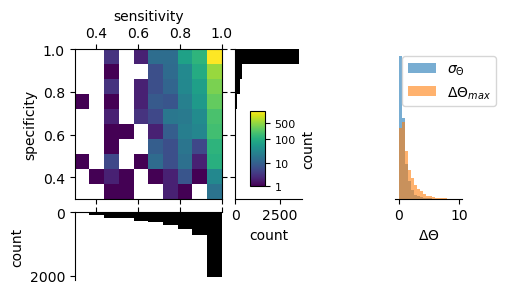

In [30]:
fig = plt.figure(figsize=(5, 3))

gs = plt.GridSpec(3, 5)
# idx = parameters['inferred']['matched']['n_fields'] == 2

idx = fields_match

frac_array = np.linspace(0.3, 1, 11)
ax_sensitivity = fig.add_subplot(gs[2, :2])
ax_sensitivity.hist(sensitivity[idx, :].flatten(), bins=frac_array, color="k")
ax_sensitivity.invert_yaxis()
ax_sensitivity.spines[["bottom", "right"]].set_visible(False)
plt.setp(
    ax_sensitivity,
    ylabel="count",
    xlim=frac_array[[0, -1]],
    xticklabels=[],
    xticks=np.linspace(0.4, 1, 4),
)
ax_sensitivity.tick_params(top=True, labeltop=False, bottom=False, labelbottom=False)

ax_specificity = fig.add_subplot(gs[:2, 2])
ax_specificity.hist(
    specificity[idx, :].flatten(), bins=frac_array, orientation="horizontal", color="k"
)
ax_specificity.spines[["top", "right"]].set_visible(False)
plt.setp(
    ax_specificity,
    xlabel="count",
    ylim=frac_array[[0, -1]],
    yticklabels=[],
    yticks=np.linspace(0.4, 1, 4),
)


hist_sens, _, _ = np.histogram2d(
    sensitivity[idx, :].flatten(),
    specificity[idx, :].flatten(),
    bins=[frac_array, frac_array],
)

hist_sens[hist_sens == 0] = np.NaN

ax_both = fig.add_subplot(gs[:2, :2])
# img = ax_both.imshow(np.log(hist_sens),origin='lower',extent=[0.5,1,0.5,1],aspect='auto')
X, Y = np.meshgrid(frac_array, frac_array)
img = ax_both.pcolormesh(
    X, Y, np.log(hist_sens)
)  # ,origin='lower',extent=[0.5,1,0.5,1],aspect='auto')
# ax_both.hist2d(sensitivity[idx,:].flatten(),specificity[idx,:].flatten(),bins=[frac_array,frac_array],cmap='viridis',density=True)
plt.setp(
    ax_both,
    xlabel="sensitivity",
    ylabel="specificity",
    xticks=np.linspace(0.4, 1, 4),
    yticks=np.linspace(0.4, 1, 4),
)
ax_both.tick_params(
    top=True,
    labeltop=True,
    bottom=True,
    labelbottom=False,
    left=True,
    labelleft=True,
    right=True,
    labelright=False,
)
ax_both.xaxis.set_label_position("top")

cax = fig.add_subplot([0.475, 0.425, 0.03, 0.25])
cbar = plt.colorbar(img, cax=cax)  # , orientation="horizontal")
cbar.set_label("count")
cax.yaxis.set_ticks_position("right")
tick_positions = [1, 10, 100, 500]
plt.setp(cax, yticks=np.log(tick_positions), yticklabels=tick_positions)
cbar.ax.tick_params(labelsize=8)


ax = fig.add_subplot(gs[:2, 4:])
ax.hist(
    theta_std.flatten(),
    bins=np.linspace(0, 10, 21),
    alpha=0.6,
    label="$\sigma_{\Theta}$",
)

# plt.setp(ax,xlabel='$\sigma_{\Theta}$')
ax.spines[["top", "right"]].set_visible(False)

# ax = fig.add_subplot(122)
ax.hist(
    dtheta_max.flatten(),
    bins=np.linspace(0, 10, 21),
    alpha=0.6,
    label="$\Delta \Theta_{max}$",
)
plt.setp(ax, xlabel="$\Delta\Theta$", yticks=[])
ax.spines[["top", "right", "left"]].set_visible(False)

ax.legend()
# specificity

3349
active_trials=array([ True, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
        True,  True,  True])
groundtruth=[ True False  True  True  True  True  True False  True False False False
 False False  True  True  True False False  True  True]
trial_activation__false_negative=array([[False, False, False,  True, False,  True,  True, False,  True,
        False, False, False, False, False, False, False, False, False,
        False, False, False]])
sensitivity=array([0.66666667]), specificity=array([0.88888889])
A0: [0.86188703] vs 0.8760397202600462
PF1_A: [7.99560959] vs 6.529216405480435
PF1_sigma: [1.83456044] vs 2.007214186675269


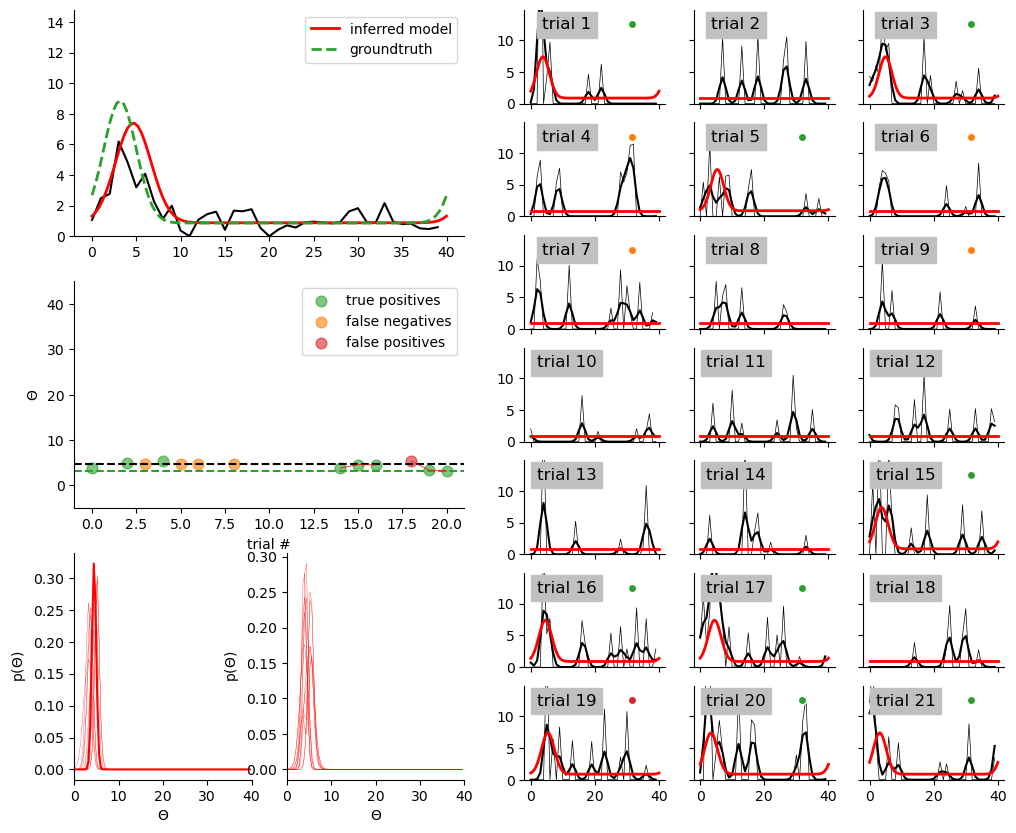

In [294]:
from placefield_dynamics.placefield_detection.analyze_results import display_results

idxes = (
    fields_match
    & (parameters["truth"]["n_fields"] == 1)
    & (sensitivity[:, 0] < 1.0)
    & (specificity[:, 0] < 1.0)
)
idx = np.random.choice(np.where(idxes)[0], 1)[0]
idx = 3349
print(idx)

display_results(
    results,
    idx,
    tuning_curve_parameter[idx],
    field_activation[idx],
)

In [662]:
def plot_vars_methods(ax, var, bins, method="peak"):

    fact = 1 if var == "A0" else 2

    idx_detected = results["status"]["is_place_cell"][f"{method}_method"]
    idx_failed = ~idx_detected

    vals = np.full((fact * n_cells, 2), np.NaN)
    vals[: fact * idx_detected.sum(), 0] = parameters_bare[var][idx_detected].flatten()
    vals[: fact * idx_failed.sum(), 1] = parameters_bare[var][idx_failed].flatten()

    ax.hist(
        vals,
        bins=bins,
        alpha=0.6,
        color=["tab:green", "tab:red"],
        label=["detected", "missed"],
        histtype="bar",
        stacked=True,
    )

    values = np.full((len(bins) - 1, 3), np.NaN)
    for i in range(2):
        values[:, i], x = np.histogram(vals[:, i], bins=bins)

    plt.setp(ax, xlabel=var, yticks=[])
    ax.spines[["top", "left", "right"]].set_visible(False)

    ax_fraction = ax.twinx()
    ax_fraction.plot(
        bins[:-1],
        gauss_smooth(values[:, 0] / values.sum(axis=1), 1, mode="constant"),
        color="tab:red",
        label="separated",
    )
    plt.setp(ax_fraction, ylim=[0, 1])
    ax_fraction.spines[["top", "left"]].set_visible(False)

In [667]:
def get_method_evaluation(method="peak"):
    fig = plt.figure(figsize=(8, 5))
    gs = plt.GridSpec(2, 3)
    ax = fig.add_subplot(gs[0, 0])
    plot_vars_methods(ax, "A0", np.linspace(2, 4, 21), method=method)
    ax = fig.add_subplot(gs[0, 1])
    plot_vars_methods(ax, "A", np.linspace(5, 20, 21), method=method)
    ax = fig.add_subplot(gs[0, 2])
    plot_vars_methods(ax, "sigma", np.linspace(0, 10, 21), method=method)
    ax = fig.add_subplot(gs[1, 0])
    plot_vars_methods(ax, "theta", np.linspace(0, 40, 21), method=method)
    ax = fig.add_subplot(gs[1, 1])
    plot_vars_methods(ax, "reliability", np.linspace(0, 1, 21), method=method)
    plt.tight_layout()

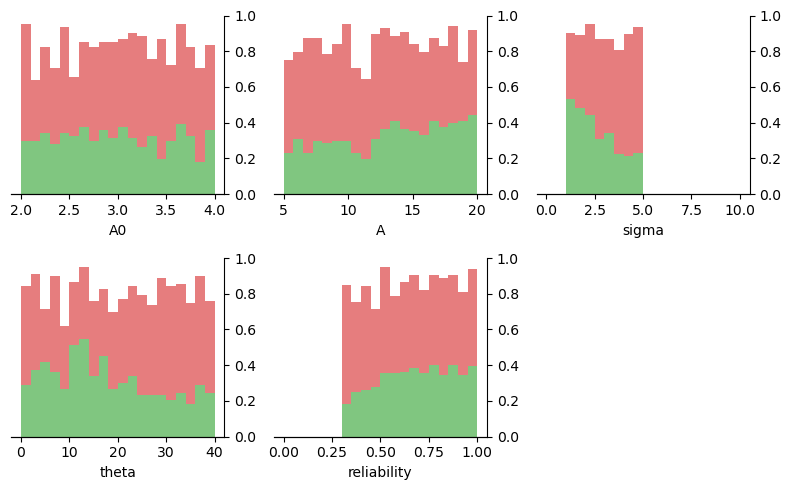

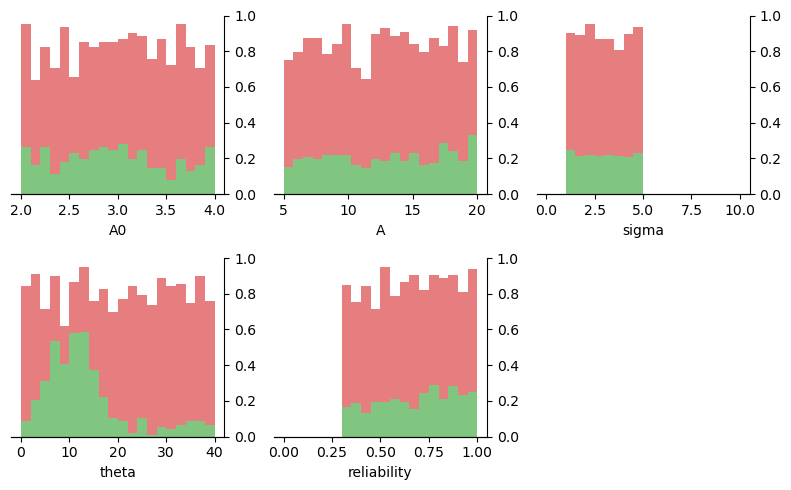

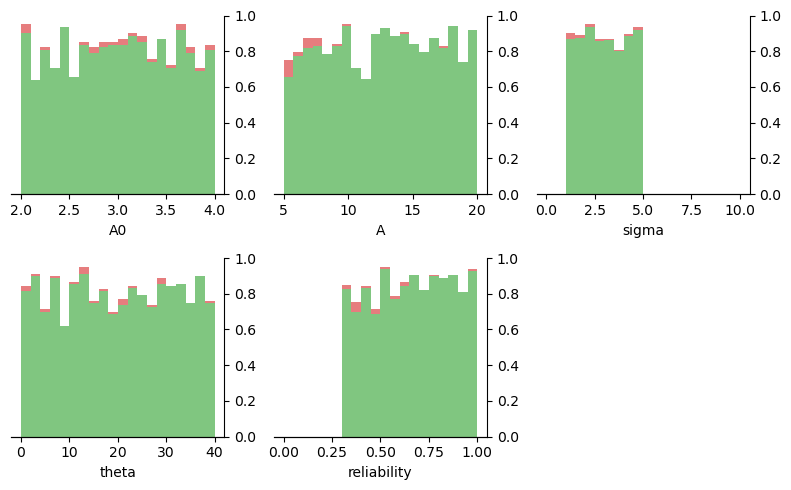

In [669]:
get_method_evaluation("peak")
get_method_evaluation("information")
get_method_evaluation("bayesian")

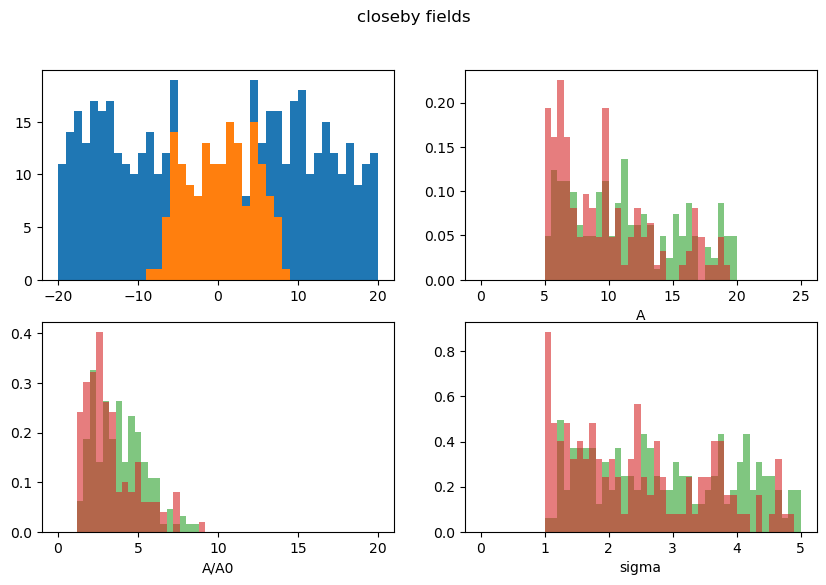

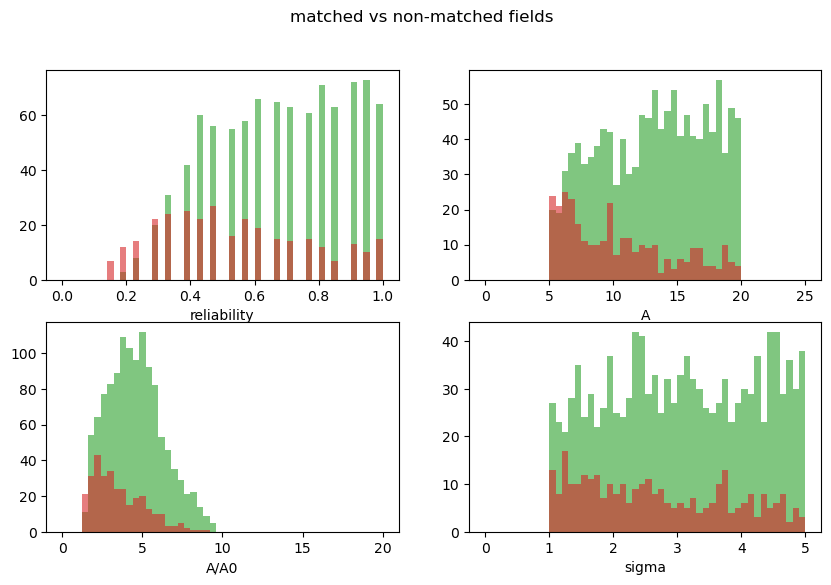

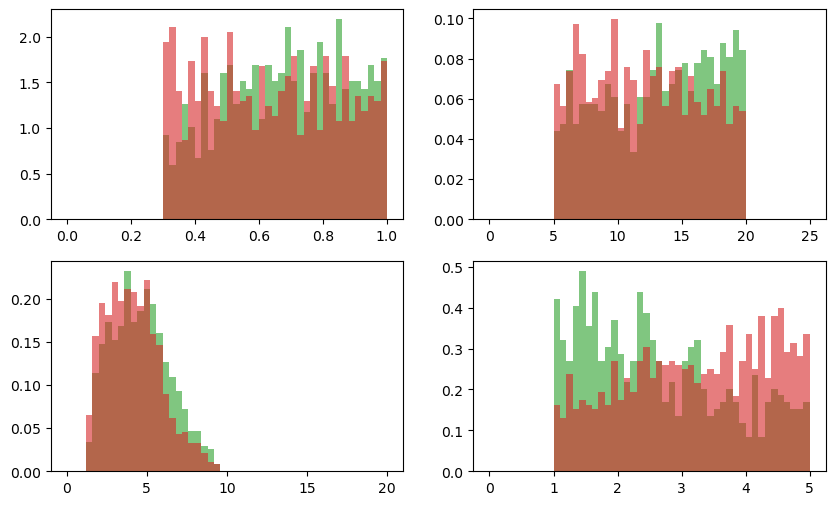

In [ ]:
"""
TODO:
        [x] write further analysis of parameter-dependent detection
        [x] get specificity and sensitivity for each cell (and plot)
        [x] get trial-activation analysis
[ ] compare to peak and information results
"""

fig, axx = plt.subplots(2, 2, figsize=(10, 6))
# idx_overlap = too_close & failed_2mode_1
# idx_overlap = (np.abs(d_theta) < 5) & failed_2mode_1

# ax.hist(dTheta[failed_2mode_1],bins=np.linspace(-20,20,41))
axx[0][0].hist(d_theta, bins=np.linspace(-20, 20, 41))
axx[0][0].hist(d_theta[idx_overlap], bins=np.linspace(-20, 20, 41))

# plot_results_with_condition(parameters,idx_overlap,axx)
# ax = fig.add_subplot(221)
A_fit = parameters["truth"]["nonmatched"]["A"][idx_overlap]
A_nofit = parameters["truth"]["nonmatched"]["A"][idx_separated]
# A_fail = A_fail[np.isfinite(A_fail)]
axx[0][1].hist(
    A_fit[np.isfinite(A_fit)],
    bins=np.linspace(0, 25, 51),
    density=True,
    alpha=0.6,
    color="tab:green",
)
axx[0][1].hist(
    A_nofit[np.isfinite(A_nofit)],
    bins=np.linspace(0, 25, 51),
    density=True,
    alpha=0.6,
    color="tab:red",
)
plt.setp(axx[0][1], xlabel="A")

# ax.hist(parameters['truth']['nonmatched']['A'][idx_overlap],bins=np.linspace(0,25,26),density=True)

A_ratio_fit = (
    parameters["truth"]["nonmatched"]["A"][idx_overlap]
    / parameters["truth"]["A0"][idx_overlap, np.newaxis]
)
A_ratio_nofit = (
    parameters["truth"]["nonmatched"]["A"][idx_separated]
    / parameters["truth"]["A0"][idx_separated, np.newaxis]
)

axx[1][0].hist(
    A_ratio_fit[np.isfinite(A_ratio_fit)],
    bins=np.linspace(0, 20, 51),
    density=True,
    alpha=0.6,
    color="tab:green",
)
axx[1][0].hist(
    A_ratio_nofit[np.isfinite(A_ratio_nofit)],
    bins=np.linspace(0, 20, 51),
    density=True,
    alpha=0.6,
    color="tab:red",
)
plt.setp(axx[1][0], xlabel="A/A0")

sigma_fit = parameters["truth"]["nonmatched"]["sigma"][idx_overlap]
sigma_nofit = parameters["truth"]["nonmatched"]["sigma"][idx_separated]

axx[1][1].hist(
    sigma_fit[np.isfinite(sigma_fit)],
    bins=np.linspace(0, 5, 51),
    density=True,
    alpha=0.6,
    color="tab:green",
)
axx[1][1].hist(
    sigma_nofit[np.isfinite(sigma_nofit)],
    bins=np.linspace(0, 5, 51),
    density=True,
    alpha=0.6,
    color="tab:red",
)
plt.setp(axx[1][1], xlabel="sigma")
plt.suptitle("closeby fields ")


fig, axx = plt.subplots(2, 2, figsize=(10, 6))
# idx_well_inferred = np.logical_and(parameters['truth']['n_fields'] == 2, parameters['truth']['matched']['n_fields'] == 2)
# print(fields_match)
density = False
idx_perfect_match = (
    parameters["truth"]["matched"]["n_fields"] == parameters["truth"]["n_fields"]
)

reliability = parameters["truth"]["matched"]["reliability"][idx_perfect_match]
reliability_fail = parameters["truth"]["nonmatched"]["reliability"]
axx[0][0].hist(
    reliability[np.isfinite(reliability)],
    bins=np.linspace(0, 1, 51),
    density=density,
    alpha=0.6,
    color="tab:green",
)
axx[0][0].hist(
    reliability_fail[np.isfinite(reliability_fail)],
    bins=np.linspace(0, 1, 51),
    density=density,
    alpha=0.6,
    color="tab:red",
)
plt.setp(axx[0][0], xlabel="reliability")

A = parameters["truth"]["matched"]["A"]
A_fail = parameters["truth"]["nonmatched"]["A"]
axx[0][1].hist(
    A[np.isfinite(A)],
    bins=np.linspace(0, 25, 51),
    density=density,
    alpha=0.6,
    color="tab:green",
)
axx[0][1].hist(
    A_fail[np.isfinite(A_fail)],
    bins=np.linspace(0, 25, 51),
    density=density,
    alpha=0.6,
    color="tab:red",
)
plt.setp(axx[0][1], xlabel="A")

A_ratio = A / parameters["truth"]["A0"][:, np.newaxis]
A_ratio_fail = A_fail / parameters["truth"]["A0"][:, np.newaxis]
axx[1][0].hist(
    A_ratio[np.isfinite(A_ratio)],
    bins=np.linspace(0, 20, 51),
    density=density,
    alpha=0.6,
    color="tab:green",
)
axx[1][0].hist(
    A_ratio_fail[np.isfinite(A_ratio_fail)],
    bins=np.linspace(0, 20, 51),
    density=density,
    alpha=0.6,
    color="tab:red",
)
plt.setp(axx[1][0], xlabel="A/A0")

sigma = parameters["truth"]["matched"]["sigma"]
sigma_fail = parameters["truth"]["nonmatched"]["sigma"]
axx[1][1].hist(
    sigma[np.isfinite(sigma)],
    bins=np.linspace(0, 5, 51),
    density=density,
    alpha=0.6,
    color="tab:green",
)
axx[1][1].hist(
    sigma_fail[np.isfinite(sigma_fail)],
    bins=np.linspace(0, 5, 51),
    density=density,
    alpha=0.6,
    color="tab:red",
)
plt.setp(axx[1][1], xlabel="sigma")

fig.suptitle("matched vs non-matched fields")


fig, axx = plt.subplots(2, 2, figsize=(10, 6))

density = True
idx_detect = is_PC["peak_method"]
# idx_detect = is_PC['information_method']

reliability = parameters_bare["reliability"][idx_detect]
reliability_fail = parameters_bare["reliability"][~idx_detect]
axx[0][0].hist(
    reliability[np.isfinite(reliability)],
    bins=np.linspace(0, 1, 51),
    density=density,
    alpha=0.6,
    color="tab:green",
)
axx[0][0].hist(
    reliability_fail[np.isfinite(reliability_fail)],
    bins=np.linspace(0, 1, 51),
    density=density,
    alpha=0.6,
    color="tab:red",
)


A = parameters_bare["A"][idx_detect]
A_fail = parameters_bare["A"][~idx_detect]
axx[0][1].hist(
    A[np.isfinite(A)],
    bins=np.linspace(0, 25, 51),
    density=density,
    alpha=0.6,
    color="tab:green",
)
axx[0][1].hist(
    A_fail[np.isfinite(A_fail)],
    bins=np.linspace(0, 25, 51),
    density=density,
    alpha=0.6,
    color="tab:red",
)

A_ratio = A / parameters_bare["A0"][idx_detect, np.newaxis]
A_ratio_fail = A_fail / parameters_bare["A0"][~idx_detect, np.newaxis]
axx[1][0].hist(
    A_ratio[np.isfinite(A_ratio)],
    bins=np.linspace(0, 20, 51),
    density=density,
    alpha=0.6,
    color="tab:green",
)
axx[1][0].hist(
    A_ratio_fail[np.isfinite(A_ratio_fail)],
    bins=np.linspace(0, 20, 51),
    density=density,
    alpha=0.6,
    color="tab:red",
)

sigma = parameters_bare["sigma"][idx_detect]
sigma_fail = parameters_bare["sigma"][~idx_detect]
axx[1][1].hist(
    sigma[np.isfinite(sigma)],
    bins=np.linspace(0, 5, 51),
    density=density,
    alpha=0.6,
    color="tab:green",
)
axx[1][1].hist(
    sigma_fail[np.isfinite(sigma_fail)],
    bins=np.linspace(0, 5, 51),
    density=density,
    alpha=0.6,
    color="tab:red",
)

# theta_close = parameters['truth']['nonmatched']['theta'][idx_overlap]
# theta_fail = parameters['truth']['nonmatched']['theta'][~idx_overlap]

# ax.hist(theta_fail[np.isfinite(theta_fail)],bins=np.linspace(0,track['nbin'],41),density=True,alpha=0.6)
# ax.hist(theta_close[np.isfinite(theta_close)],bins=np.linspace(0,track['nbin'],41),density=True,alpha=0.6)


plt.show(block=False)

# np.isfinite(d_theta).sum()
# (np.abs(d_theta)<7).sum()

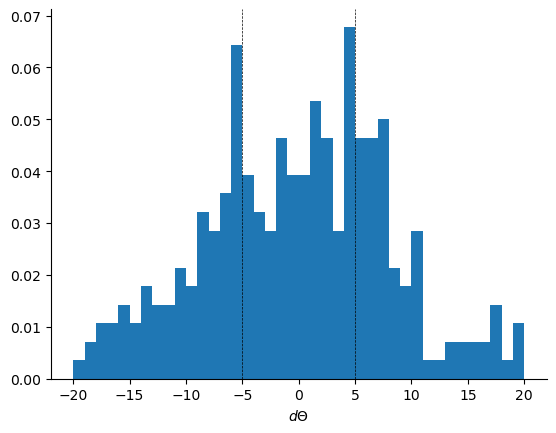

In [436]:
idx_two_fields = parameters_bare["n_fields"] == 2
failed_2mode = np.logical_and(
    parameters["truth"]["n_fields"] == 2,
    parameters["truth"]["matched"]["n_fields"] != 2,
)
failed_2mode_1 = np.logical_and(failed_2mode, results["fields"]["n_modes"] == 1)
dTheta = (
    np.mod(np.diff(parameters_bare["theta"], axis=1) + nbin / 2.0, nbin) - nbin / 2.0
)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.axvline(-5, color="k", ls="--", lw=0.5)
ax.axvline(5, color="k", ls="--", lw=0.5)

ax.hist(
    dTheta[failed_2mode_1], bins=np.linspace(-20, 20, 41), density=True
)  # ,cumulative=True,histtype='step')
plt.setp(ax, xlabel="$d\Theta$")
ax.spines[["top", "right"]].set_visible(False)

In [240]:
surrogate_parameters["theta"]
neuron = 5
print(surrogate_parameters["theta"][neuron, ...])
print(surrogate_parameters["n_fields"][neuron, ...])
print(results["fields"]["n_modes"][neuron])
# surrogate_parameters['n_fields'][2]
# surrogate_data.tuning_curve_parameter[2]

# (surrogate_parameters['n_fields']==2).sum()

[37.97983555         nan         nan]
2.0
1


In [210]:
surrogate_parameters["theta"][:, 0]

array([1.08839294e+01, 1.30669771e+01, 3.55093196e+01, 3.57491713e+00,
       2.15035419e+01, 3.79798355e+01, 2.85295631e+01, 1.50697318e+01,
       2.95554429e+00, 3.17066238e+00, 2.45430783e+01, 3.07223241e+01,
       2.28712024e+01, 3.77783802e+01, 1.91206928e+01, 2.12689625e+01,
       6.46805386e+00, 7.93262319e+00, 2.48249876e+01, 2.80386918e+01,
       2.77160788e+01, 3.54007476e+00, 1.21394299e+01, 2.94718063e+01,
       1.33134010e+01, 2.09780861e+01, 2.97152718e+01, 3.55462004e+01,
       1.45148104e+01, 6.77998831e+00, 2.87671262e+01, 3.98134125e+01,
                  nan, 3.78837374e+00,            nan, 1.90744785e+01,
       1.09779142e+00, 2.02211672e+01, 2.73951146e+01, 1.19947160e+01,
       1.17423122e+01, 1.22060983e+01, 7.51973265e-01, 1.42302748e+01,
       8.95944740e-01, 1.30114568e+01, 6.79204015e+00, 3.23304364e+01,
       1.67064374e+01, 1.61856601e+01, 5.25678287e+00, 4.79862709e+00,
       3.80063581e+01, 2.74179990e+01, 3.67418198e+01, 1.71298635e+01,
      

sensitivity=array([0.7]), specficity=array([0.54545455])
A0: 3.988112331467224 vs 4.165894256315229
PF1_A: 12.08548390322946 vs 16.314281704454604
PF1_sigma: 1.1761498359642761 vs 0.6763187738588139


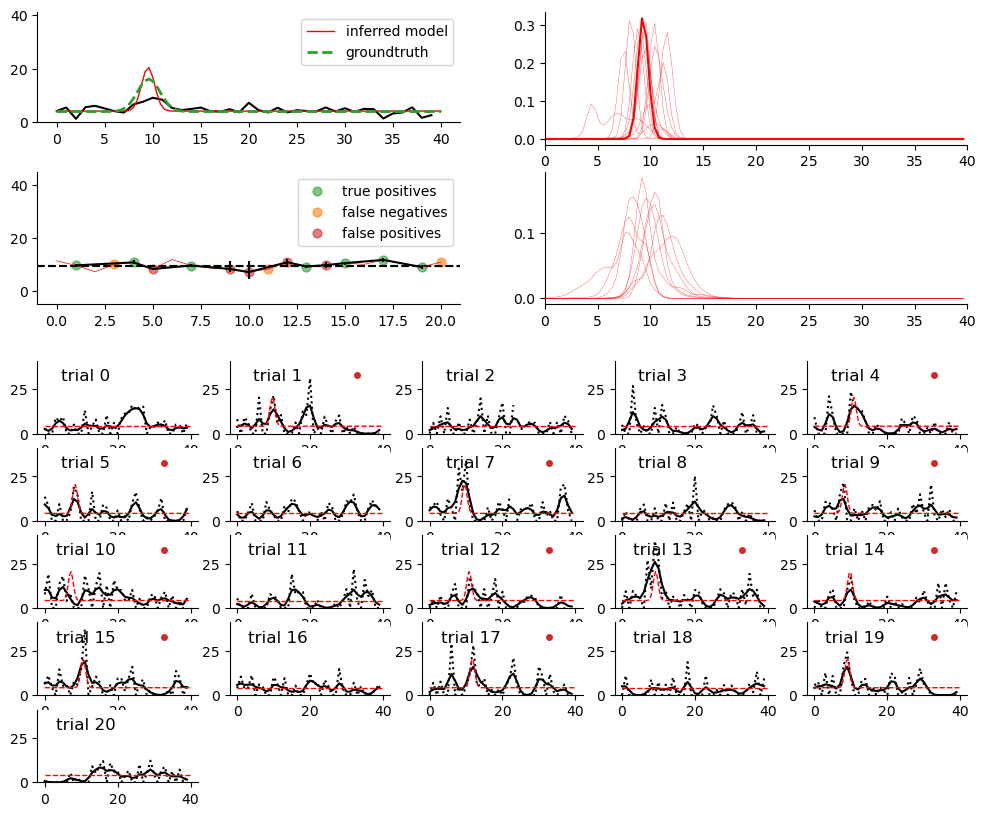

In [129]:
from display_inference_results import display_results

neuron = 750

display_results(
    results,
    neuron,
    groundtruth_fields=surrogate_data.tuning_curve_parameter[neuron],
    groundtruth_activation=surrogate_data.field_activation[neuron, ...],
)

In [117]:
int(np.ceil(21 / 8))

3

In [57]:
results["fields"]["logz"][neuron, ...]
# results['status']['is_place_cell']['bayesian_method']
# results['fields']['n_modes']
# results['fields']['active_trials'][3,...]
# results['fields']['parameter']['global']['theta'][3,...]

"""
	TODO:
		- how to compare, when 2 fields are generated and overlapping strongly?
"""

array([[-1.11558820e+03,  2.08616684e-01],
       [-1.08660970e+03,  5.61147377e-01],
       [-1.10748643e+03,  4.42314008e-01]])

In [ ]:
import logging
from Programs.PC_analysis.placefield_dynamics.placefield_detection.BayesModel import HierarchicalBayesInference

neuron = 10
nbin = 40

activity = prepare_activity(
    surrogate_data.activity[neuron, :],
    behavior["active"],
    behavior["trials"],
    nbin=nbin,
)
# activity = prepare_activity(activity_single,behavior['active'],behavior['trials'],nbin=nbin)

hierarchical = ["theta"]
wrap = []

hbm = HierarchicalBayesInference(
    activity["spike_map"],
    behavior["trials"]["dwelltime"],
    nbin,
    logLevel=logging.ERROR,
)

single_result = hbm.model_comparison(hierarchical=["theta"], plot=False)

Model comparison finished after 48.06s with evidences: 	 f=0 , logz=-1287.80	 f=1 , logz=-1170.47	 f=2 *, logz=-1148.96


sensitivity=array([0.6, 1. ]), specficity=array([1., 1.])
A0: [3.7466364] vs 3.0286865770398115
PF1_A: [5.50994282] vs 6.7361411417683925
PF1_sigma: [3.32963978] vs 3.732202833916138
PF2_A: [16.47326788] vs 18.05079892493783
PF2_sigma: [2.32270533] vs 2.1980308813207574


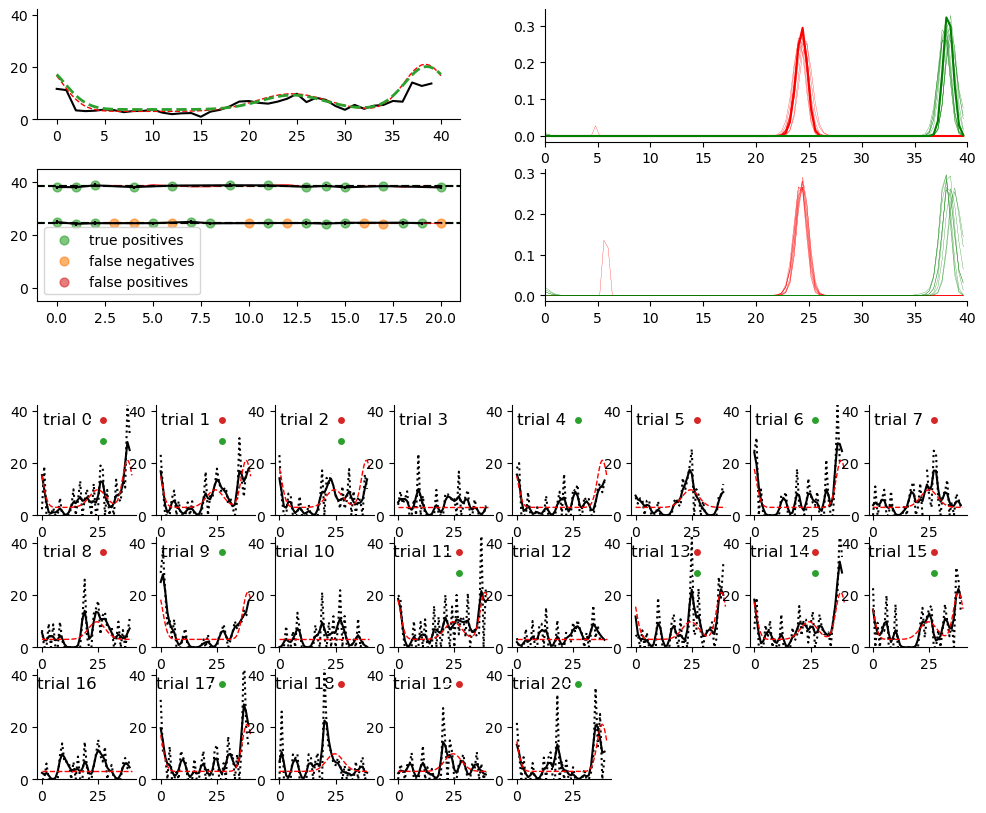

In [99]:
display_results(
    single_result,
    groundtruth_activation=surrogate_data.field_activation[neuron, ...],
    groundtruth_fields=surrogate_data.tuning_curve_parameter[neuron],
)